In [116]:
#TimeSeries With LSTM

In [118]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


In [120]:
#The two most commonly used gated RNNs are Long Short-Term Memory Networks and Gated Recurrent Unit Neural Networks.

In [122]:
#Generate the 1000 value from sine function and use that as training data

In [126]:
time = np.arange(0, 100, 0.1)
## Add noise to the data, by adding random value to each data point, the random
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

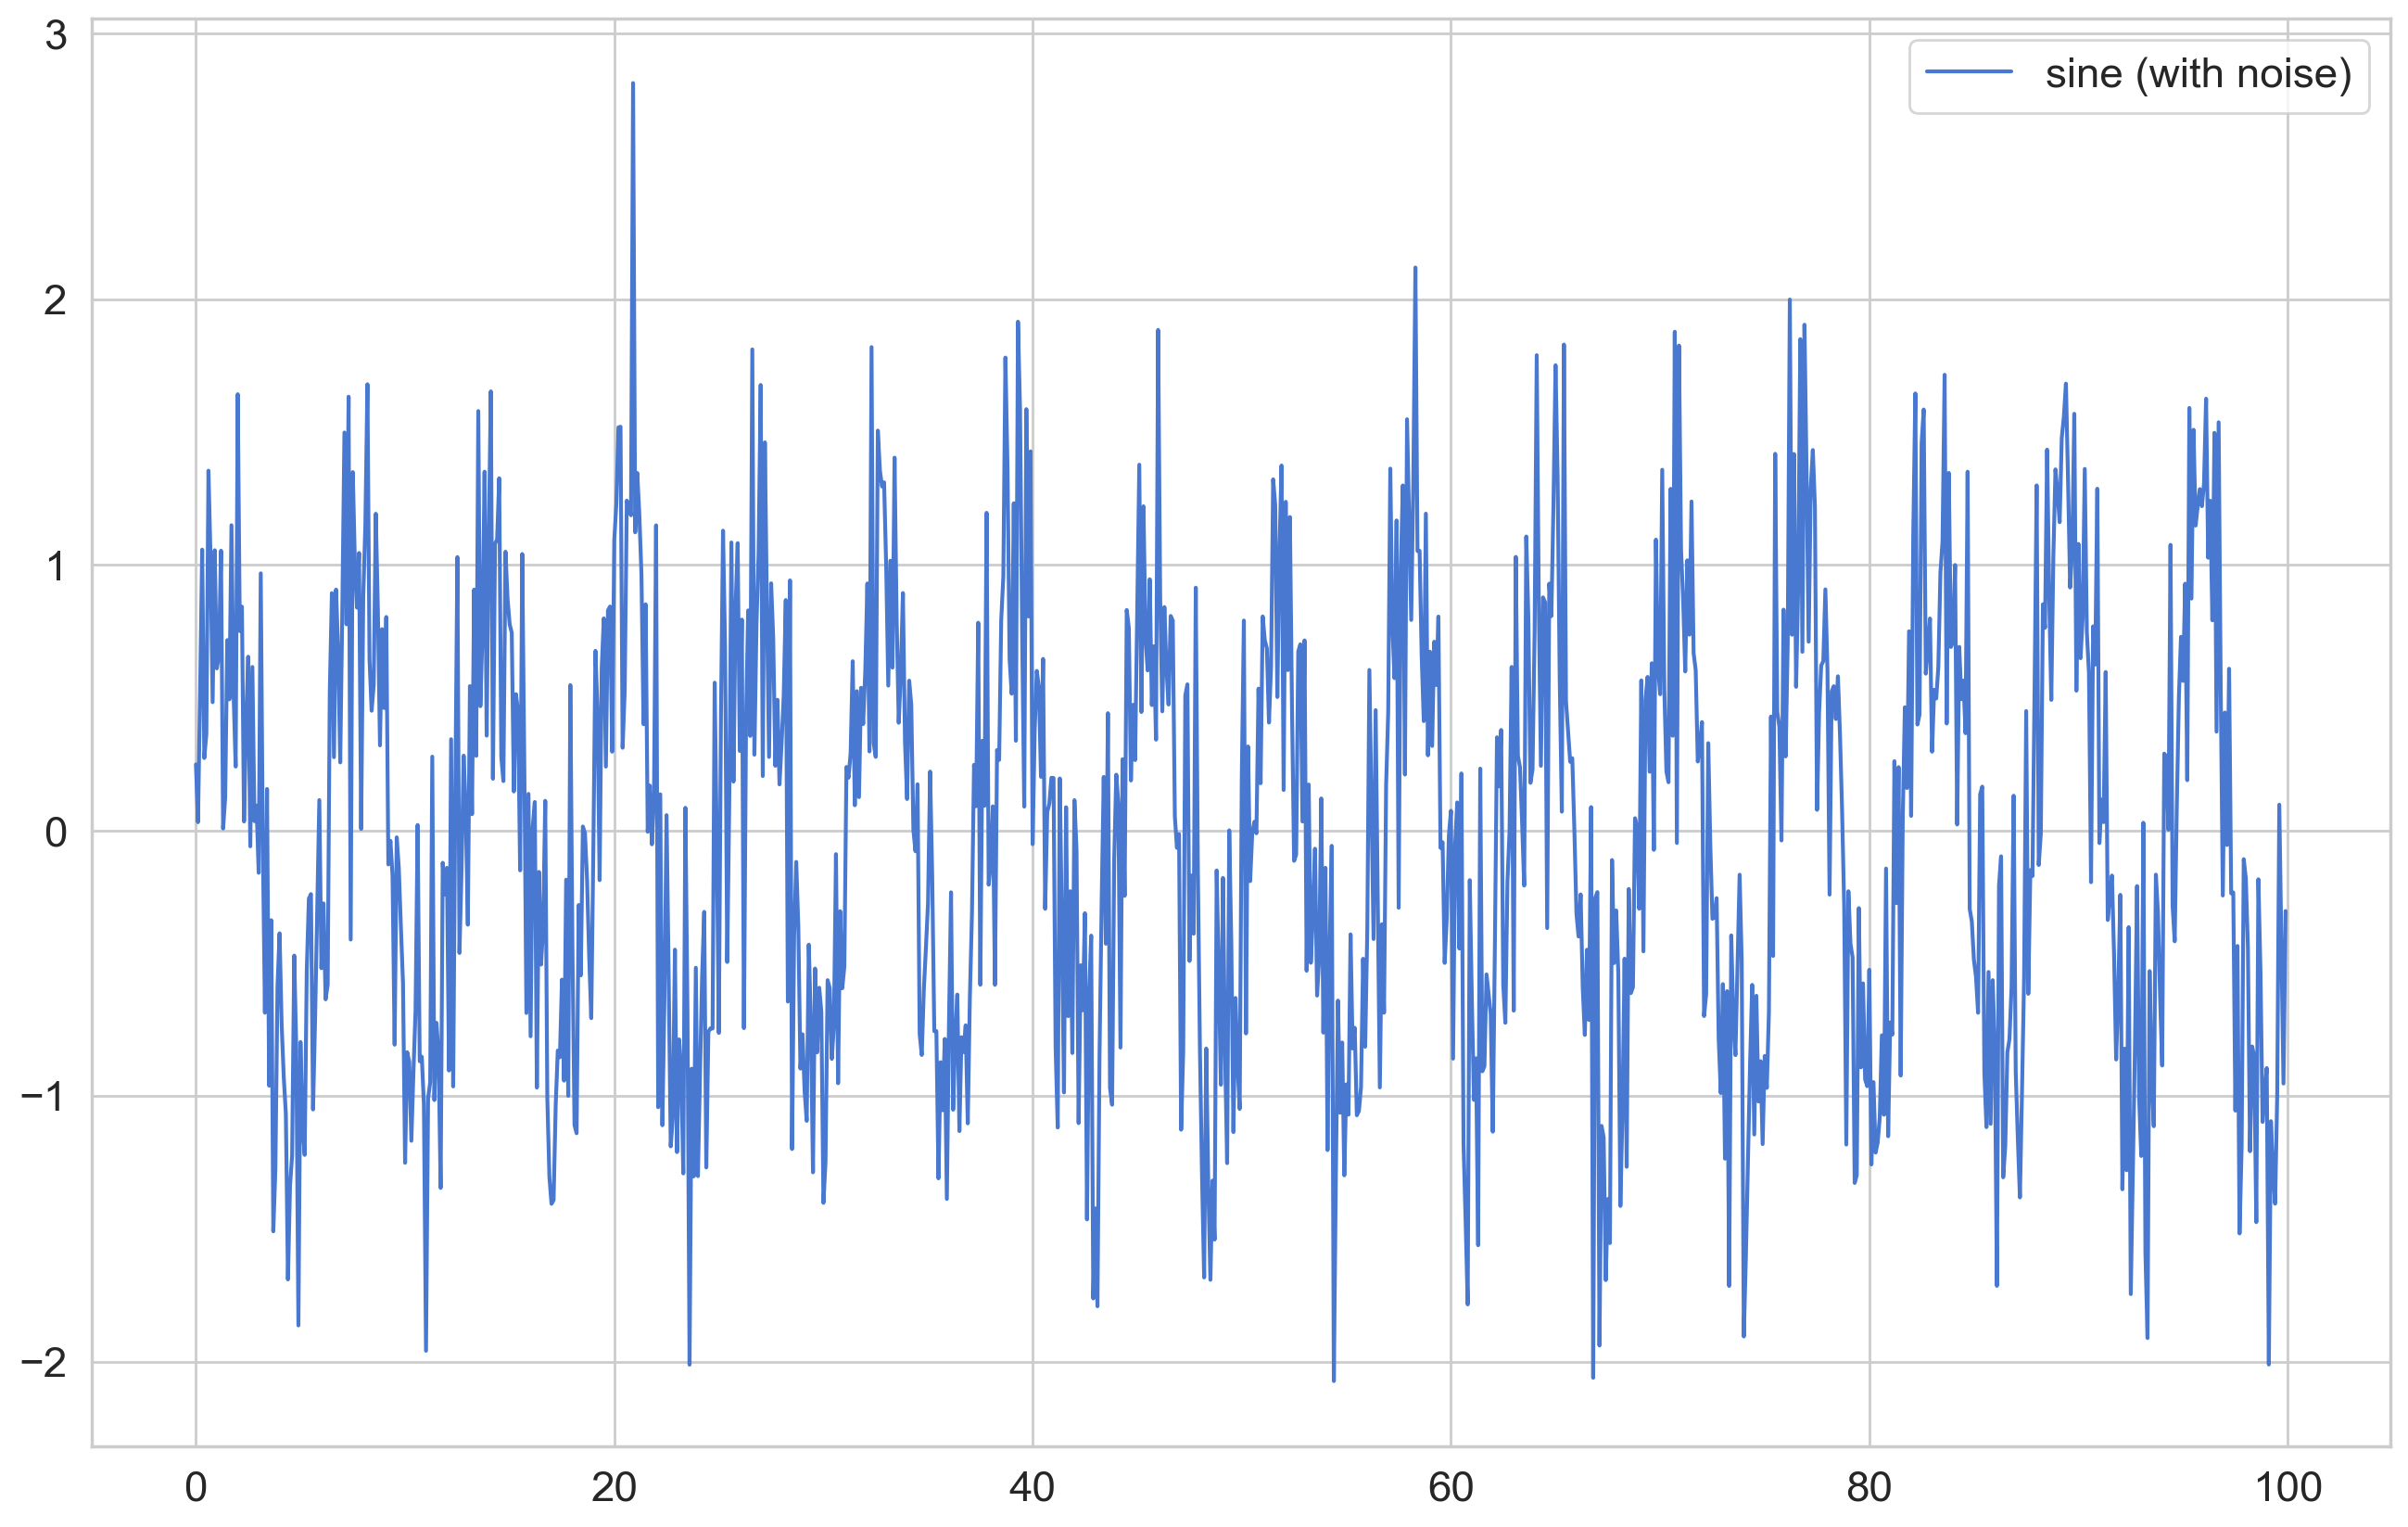

In [128]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();


In [130]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()


,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [132]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [136]:
def create_dataset(X, y, time_steps=1):
 """
 Works with single features(univariate) and multiple features
 
 """
 Xs, ys = [], []
 for i in range(len(X) - time_steps):
     v = X.iloc[i:(i + time_steps)].values
     Xs.append(v)
     ys.append(y.iloc[i + time_steps])
 return np.array(Xs), np.array(ys)

In [138]:
# History of 10 time steps to make the sequences
time_steps = 10

In [140]:
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)


(790, 10, 1) (790,)


In [142]:
#Train in Keras lstm layers are used in sequential model to make the predictions


In [146]:
 model = keras.Sequential()
model.add(keras.layers.LSTM(
 units=128,
 input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile( loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.001))

In [148]:
history = model.fit(
 X_train, y_train,
 epochs=30,
 batch_size=16,
 validation_split=0.1,
 verbose=1,
 shuffle=False
)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4666 - val_loss: 0.3654
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3151 - val_loss: 0.3234
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3012 - val_loss: 0.3208
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3011 - val_loss: 0.3181
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3003 - val_loss: 0.3163
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2997 - val_loss: 0.3148
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2991 - val_loss: 0.3134
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2986 - val_loss: 0.3121
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2980 - val_loss: 0.3108
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2974 - val_loss: 0.3096
Epoch 11/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2968 - val_loss: 0.3085
Epoch 12/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2962 - val_lo

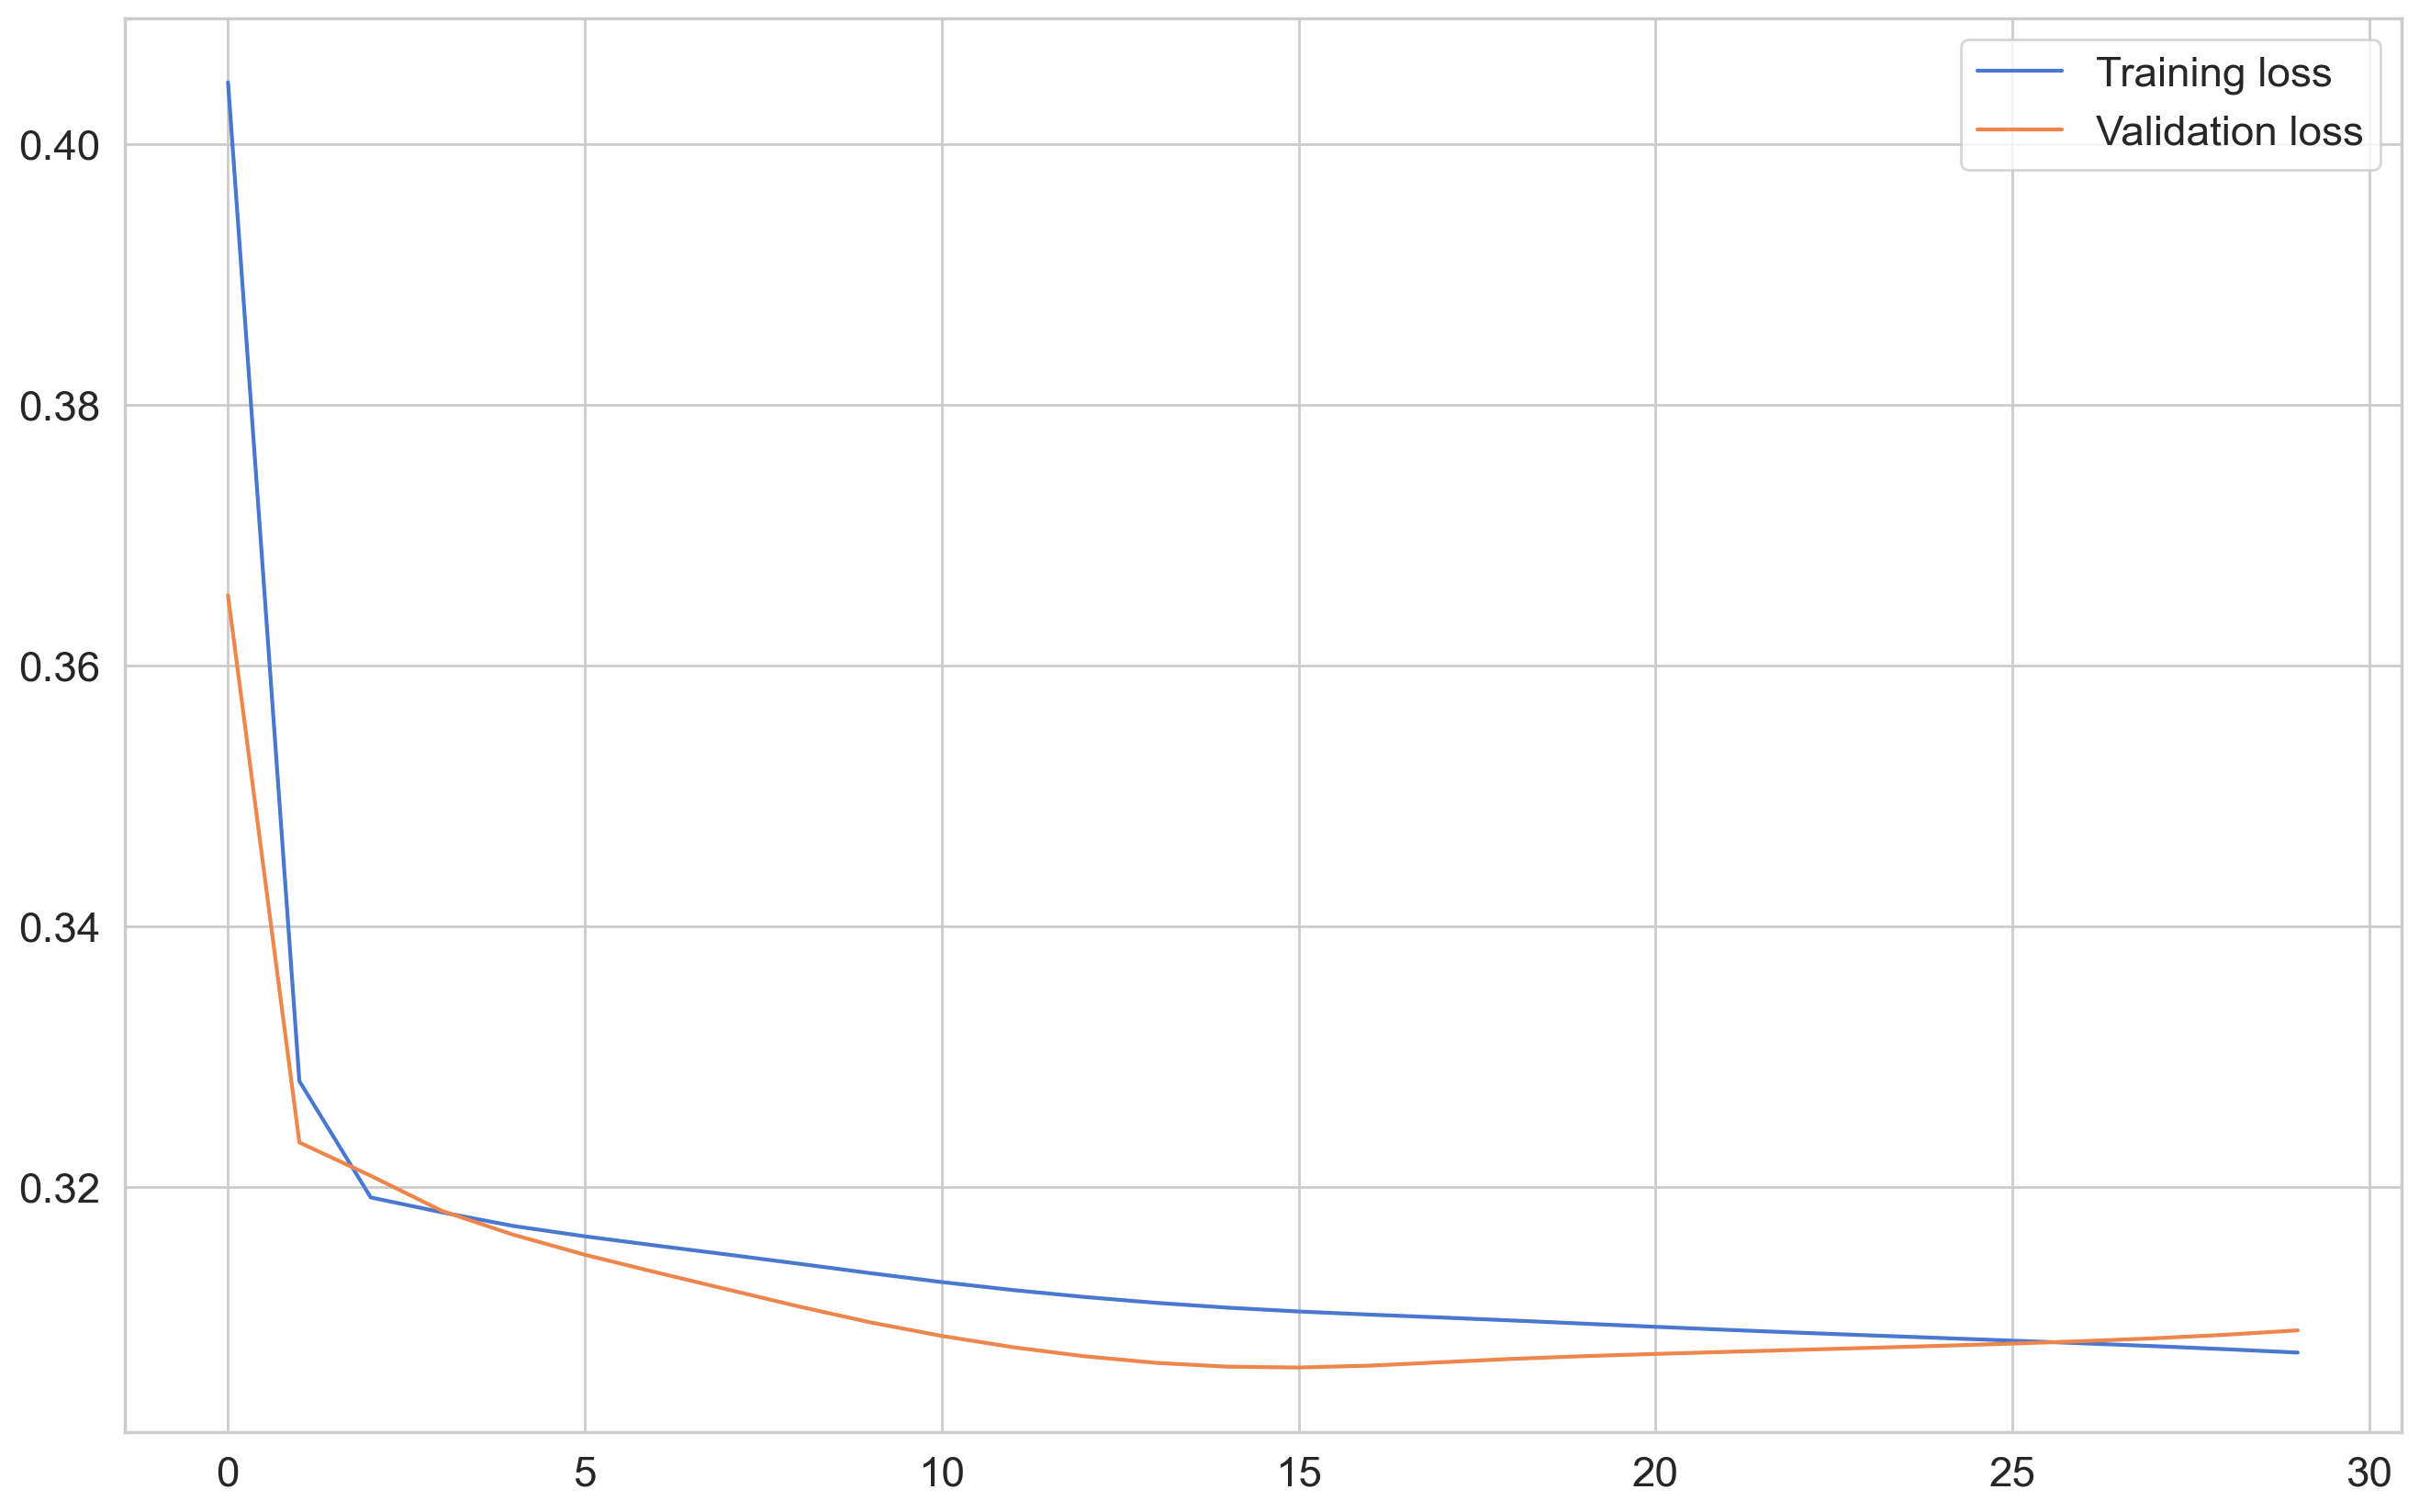

In [150]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();


In [152]:
#Our dataset is pretty simple and contains the randomness from our sampling After about 15 epochs, the model is pretty much-done learning.


In [154]:
#Evaluation 

In [156]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [160]:
#Plot the predictions over true values from the time series


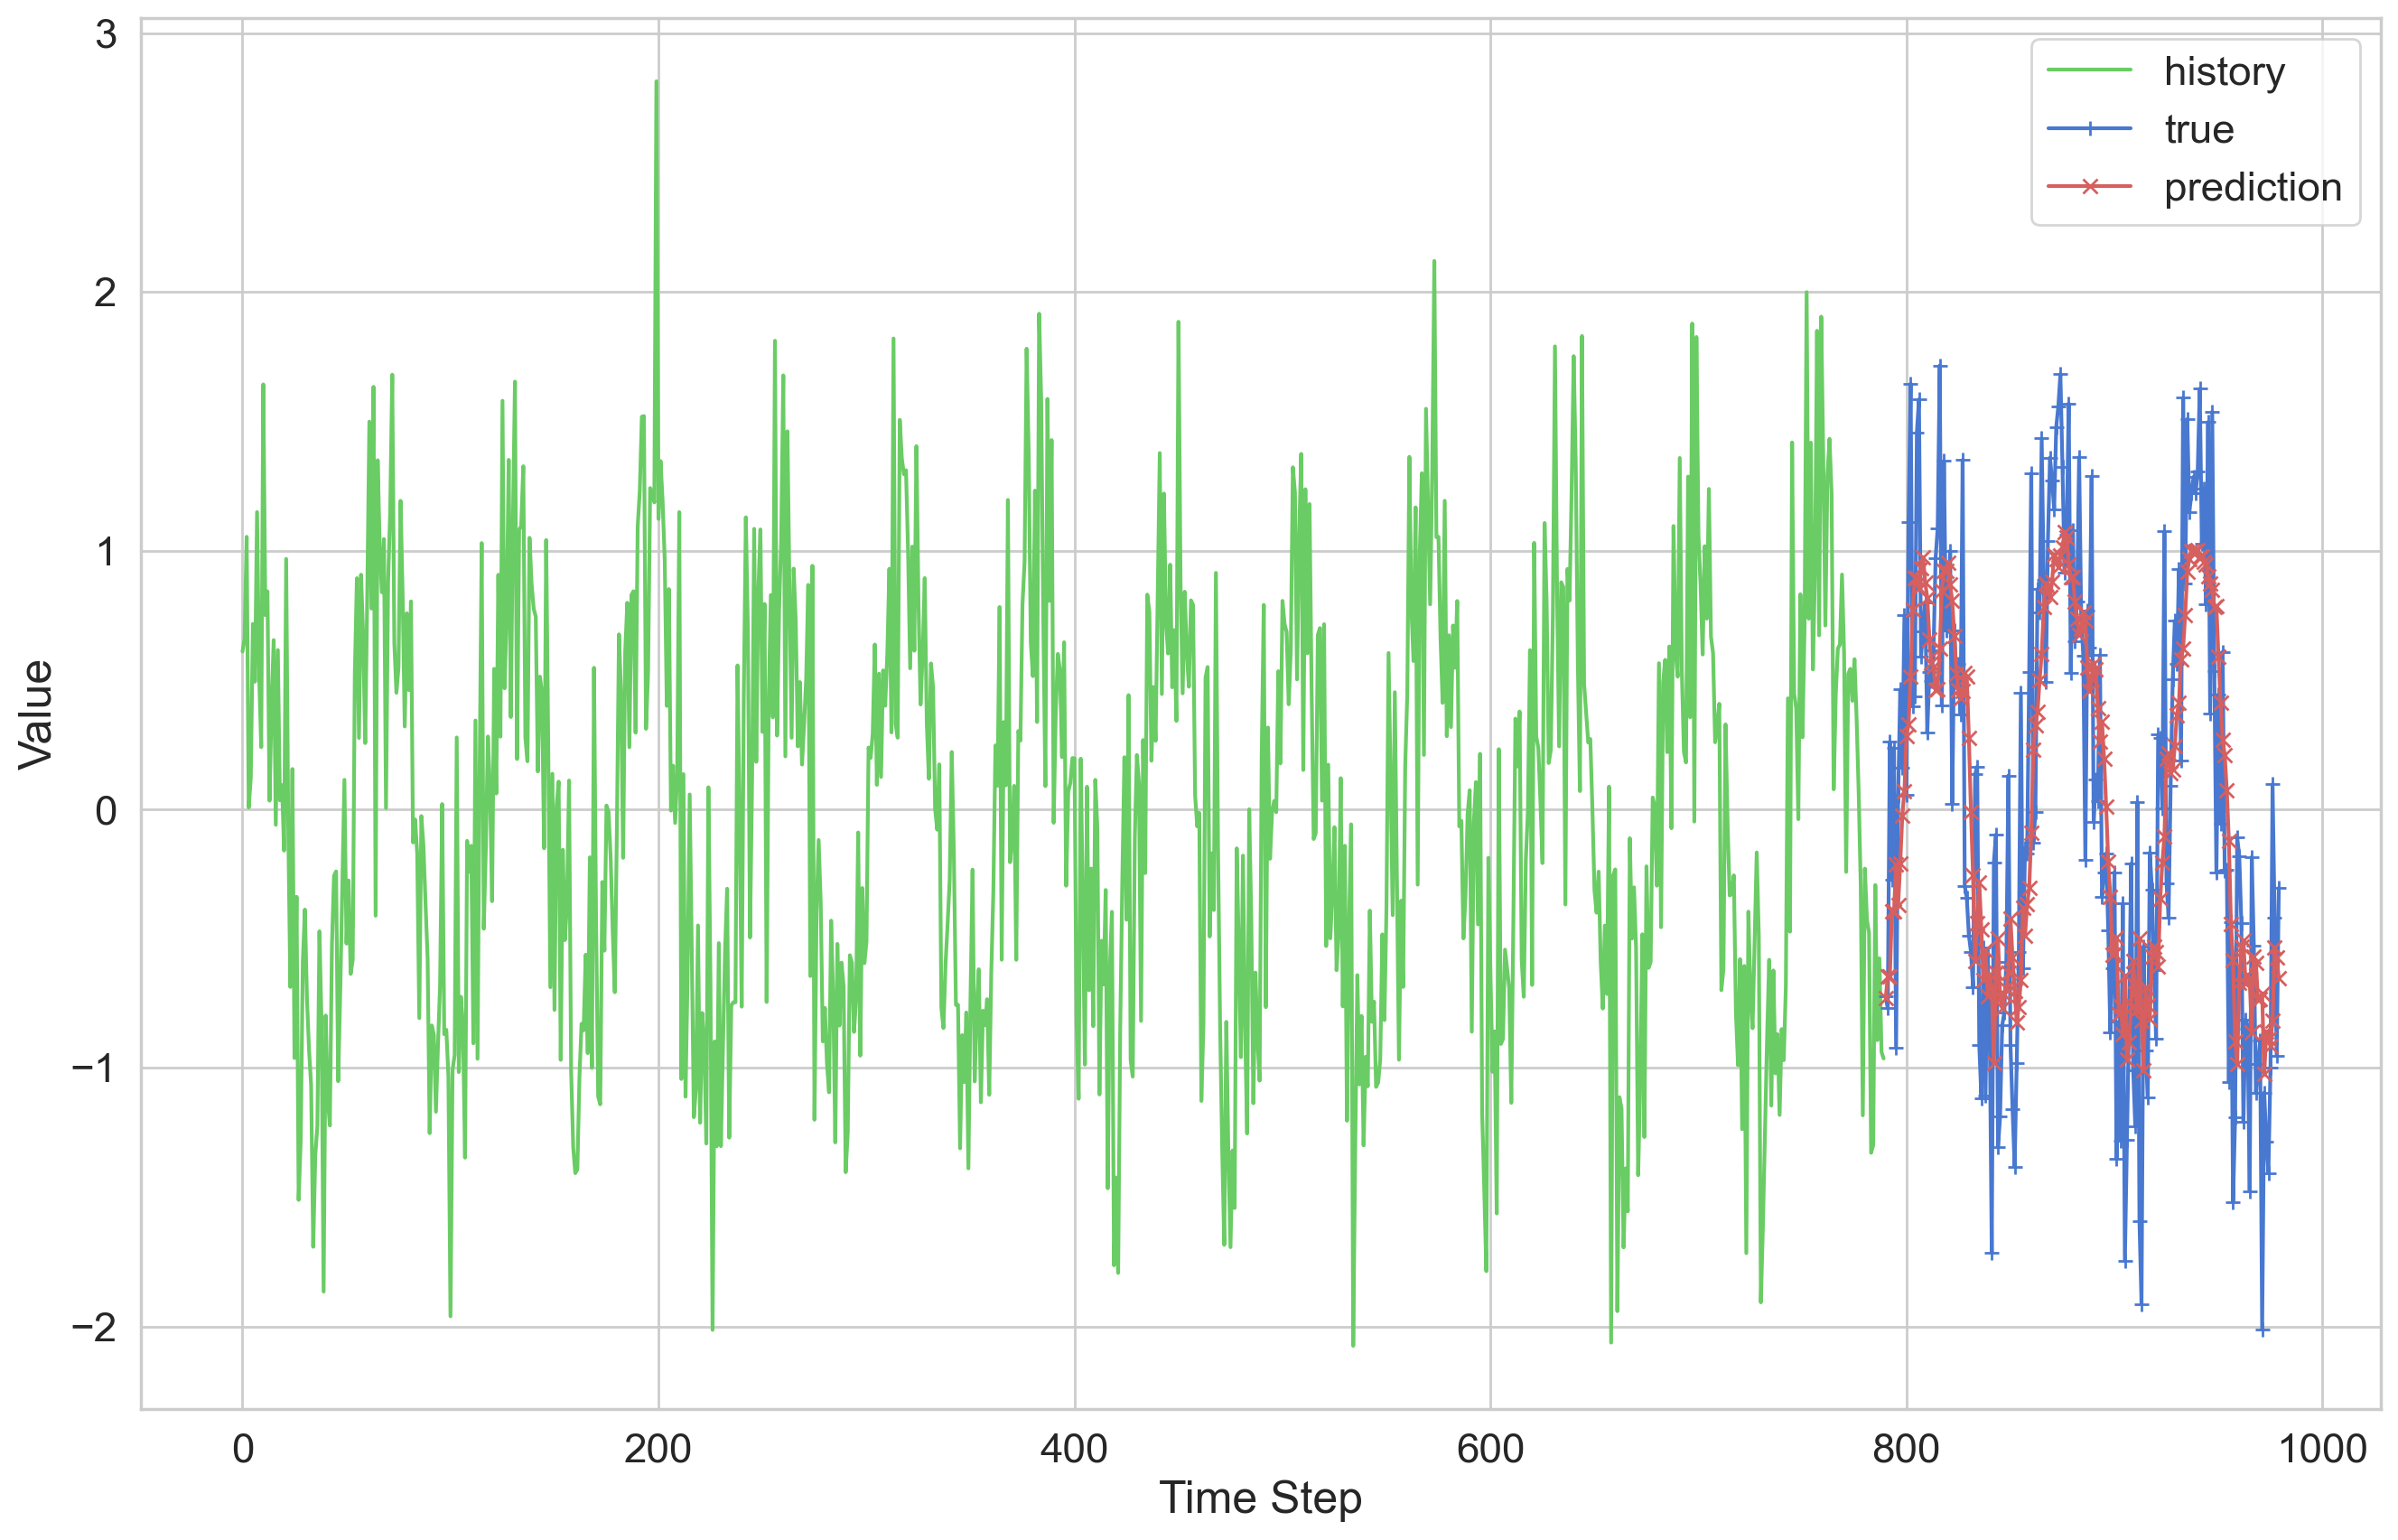

In [168]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test,marker='+', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r',marker='x', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();


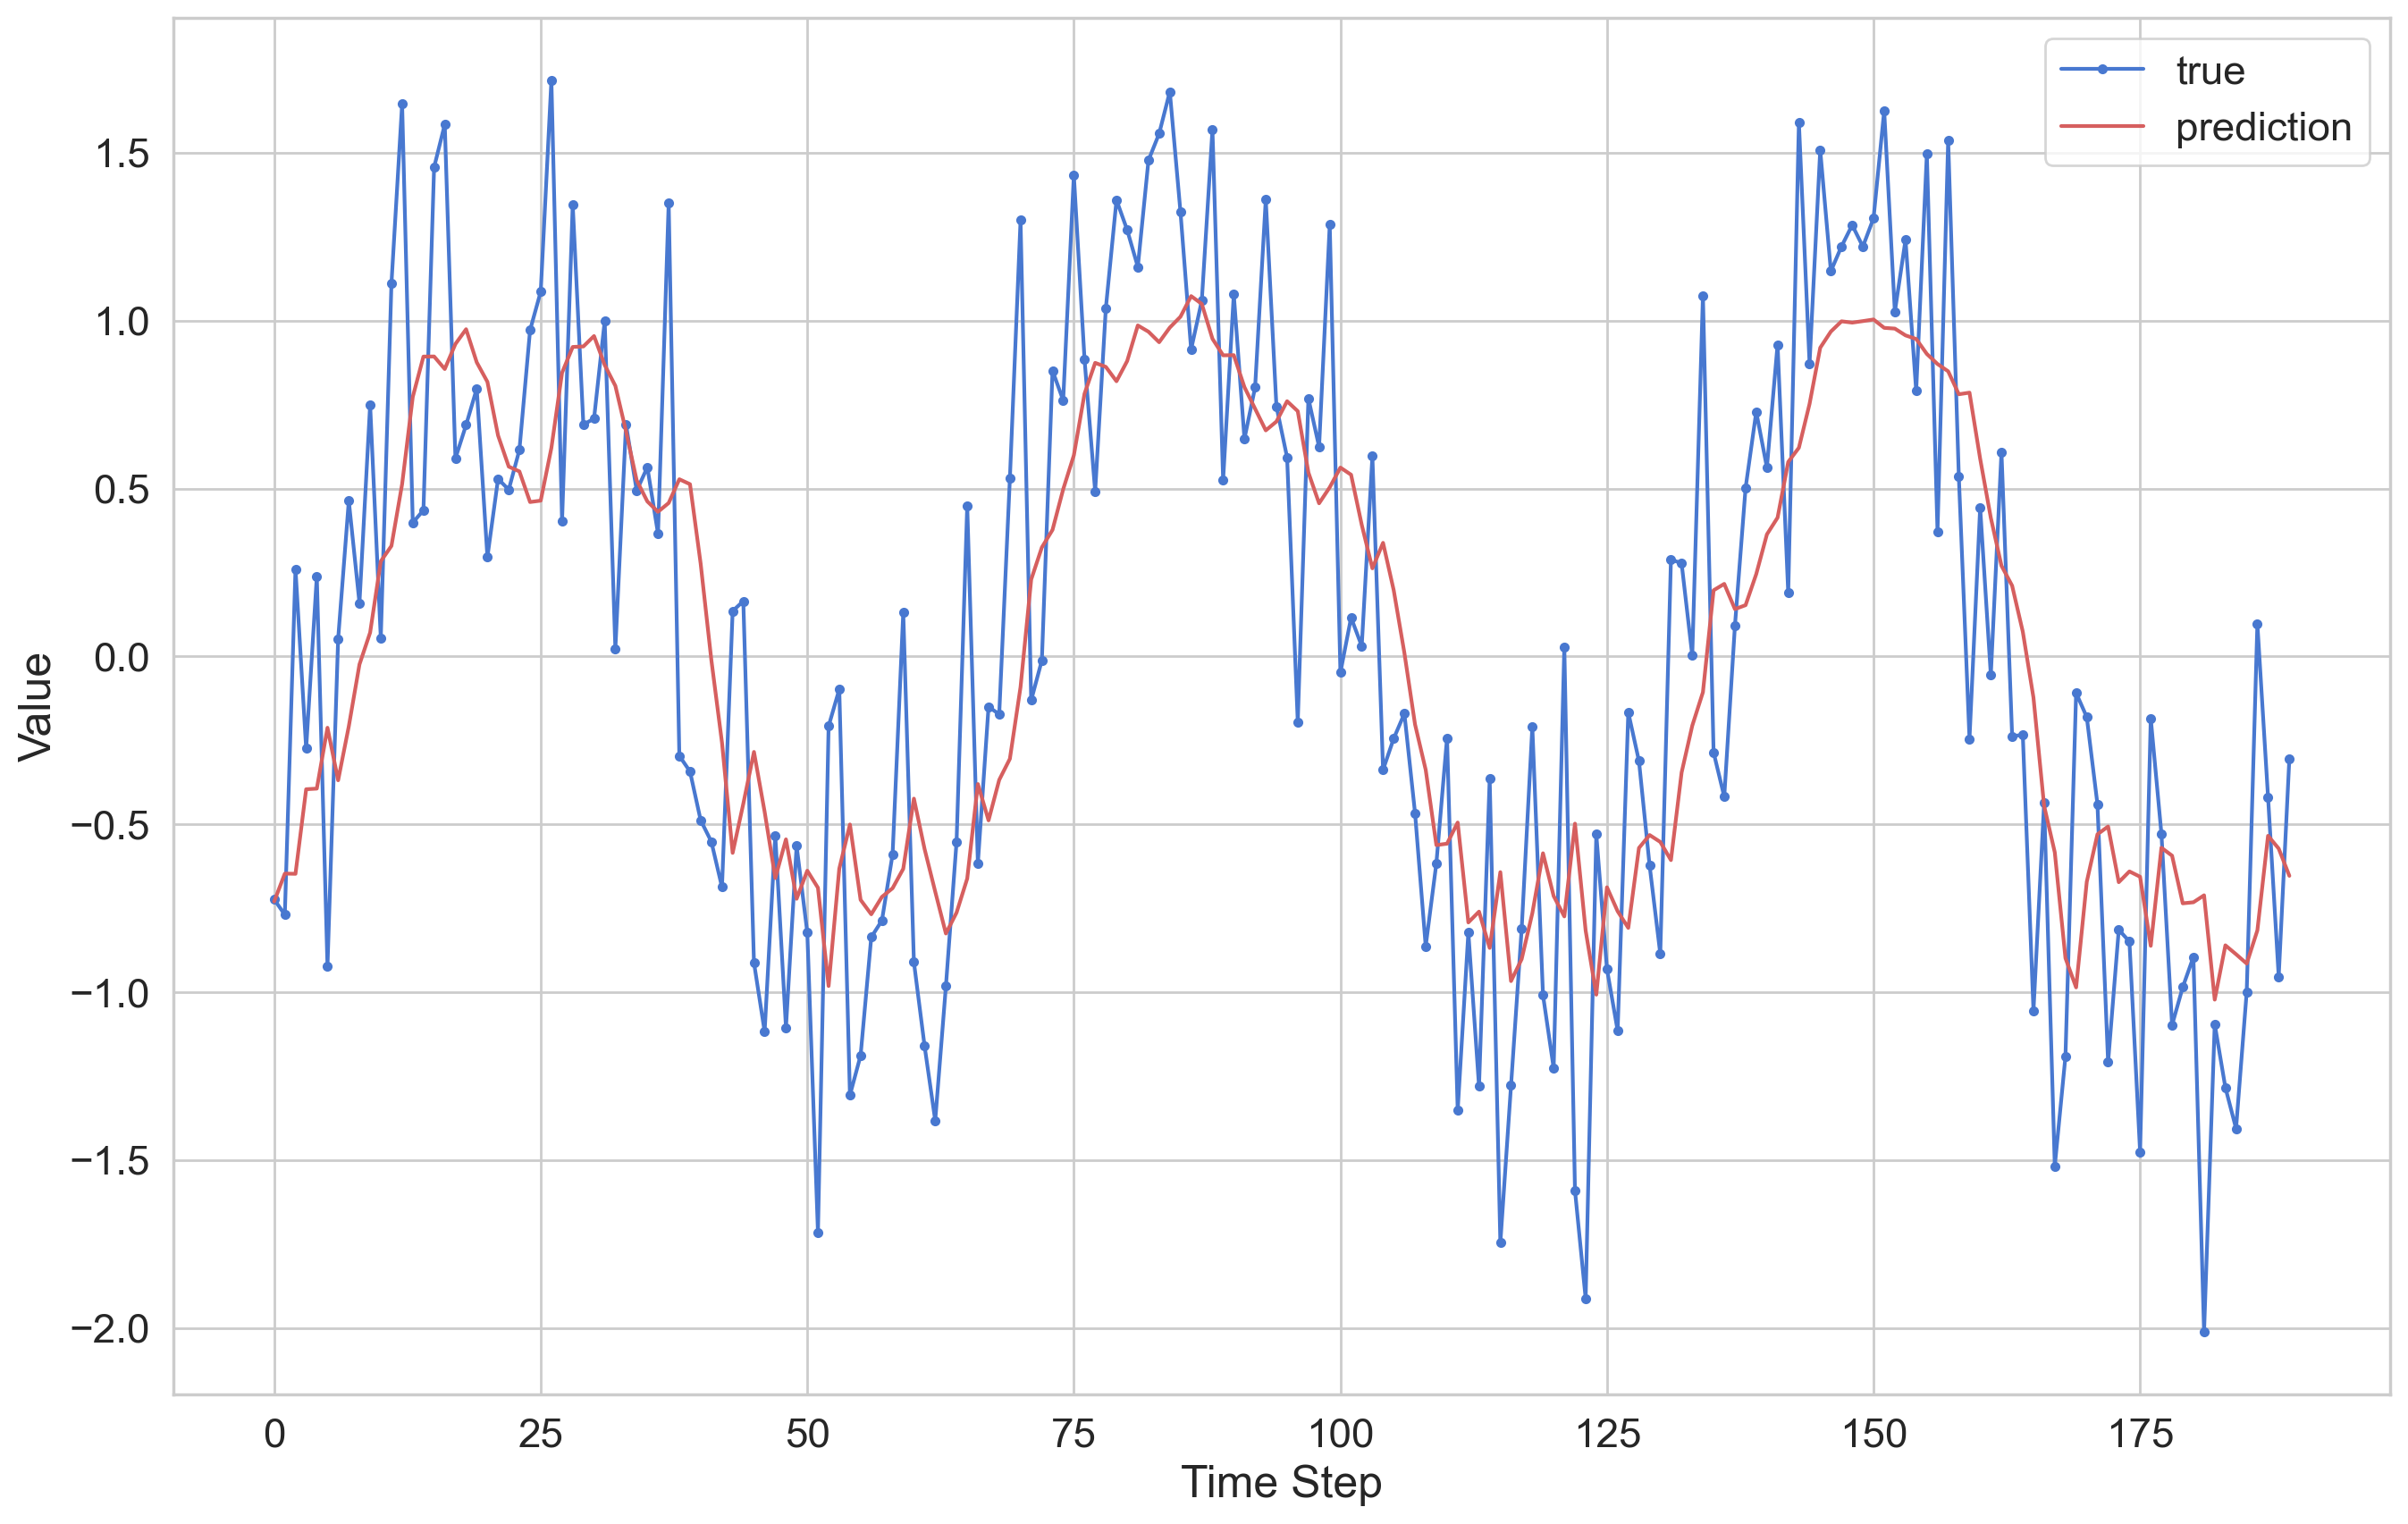

In [170]:

plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [1]:
#Energy Price Prediction with LSTM-Time Series

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

import seaborn as sns
sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})

pd.set_option('display.float_format', lambda x: '%.4f' % x)
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data\\EU_energy_data.csv")
df.head()

,Unnamed: 0,fecha,hora,sistema,bandera,precio,tipo_moneda,origen_dato,fecha_actualizacion
0,0,2010-07-21,1,HU,1,39.2870,1,6,2021-10-01 12:39:53
1,1,2010-07-21,2,HU,1,35.9250,1,6,2021-10-01 12:39:53
2,2,2010-07-21,3,HU,1,33.2230,1,6,2021-10-01 12:39:53
3,3,2010-07-21,4,HU,1,30.8420,1,6,2021-10-01 12:39:53
4,4,2010-07-21,5,HU,1,33.3950,1,6,2021-10-01 12:39:53


In [7]:
df = df.rename(columns = {'fecha' : 'Date','hora' : 'Hour' , 'sistema' : 'EU_countries','bandera' : 'Renewable/Non_Renewable',
                         'precio' : 'Cost(€/MWh)','tipo_moneda' : 'CurrencyType','origen_dato' : 'DataSource', 'fecha_actualizacion' : 'Updated_Date'})                                                
df = df.drop('Unnamed: 0',axis=1)

#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')     
df['Hour'] = df['Hour'].astype(str).str.zfill(2)

try:
  df['Hour'] = pd.to_numeric(df['Hour'])
except:
  # Handle conversion errors (e.g., non-numeric characters)
  print("Error converting 'Hour' column to numeric")

# Function to convert the range
def convert_range(value):
  # Handle edge cases (leading zero and exceeding 24)
  if value == '01':
    return 0
  elif value > 24:
    raise ValueError("Value exceeds 24")
  else:
    # Remove leading zero (assuming strings) or subtract 1 (assuming integers)
    return int(value) - 1 if isinstance(value, int) else int(value[1:])

# Apply the conversion function
df['Hour'] = df['Hour'].apply(convert_range)

# Function to replace values with leading zeros (handles all cases)
def replace_with_leading_zero(value):
  if 0 <= value <= 23:
    return f"{value:02d}"  # Use f-string for consistent formatting
  else:
    raise ValueError(f"Value {value} is outside the range 0-12")

# Apply the function
df['Hour'] = df['Hour'].apply(replace_with_leading_zero)
df['Hour'] = df['Hour'].astype(str)  # Ensure Hour is string type
df['Hour'] = df['Hour'] + ':00:00'

df["Period"] = df[["Date","Hour"]].apply(" ".join, axis=1)

df = df [['Period','EU_countries', 'Renewable/Non_Renewable',
       'Cost(€/MWh)', 'CurrencyType', 'DataSource', 'Updated_Date']]

df['Period'] = pd.to_datetime(df['Period'],format ="%Y-%m-%d %H:%M:%S" )
df.head()

,Period,EU_countries,Renewable/Non_Renewable,Cost(€/MWh),CurrencyType,DataSource,Updated_Date
0,2010-07-21 00:00:00,HU,1,39.2870,1,6,2021-10-01 12:39:53
1,2010-07-21 01:00:00,HU,1,35.9250,1,6,2021-10-01 12:39:53
2,2010-07-21 02:00:00,HU,1,33.2230,1,6,2021-10-01 12:39:53
3,2010-07-21 03:00:00,HU,1,30.8420,1,6,2021-10-01 12:39:53
4,2010-07-21 04:00:00,HU,1,33.3950,1,6,2021-10-01 12:39:53


In [8]:
df['EU_countries'] = df['EU_countries'].replace('ES', 'Spain')
df_Spain = df[df['EU_countries']== "Spain"]
df_Spain.head()

,Period,EU_countries,Renewable/Non_Renewable,Cost(€/MWh),CurrencyType,DataSource,Updated_Date
179164,2014-01-01 00:00:00,Spain,0,20.0200,1,1,2021-10-01 12:39:53
179185,2014-01-01 01:00:00,Spain,0,10.3400,1,1,2021-10-01 12:39:53
179206,2014-01-01 02:00:00,Spain,0,5.3500,1,1,2021-10-01 12:39:53
179227,2014-01-01 03:00:00,Spain,0,5.0000,1,1,2021-10-01 12:39:53
179248,2014-01-01 04:00:00,Spain,0,0.5000,1,1,2021-10-01 12:39:53


In [11]:
# Remove the unnecessary feature
df_Spain = df_Spain.drop(['EU_countries','CurrencyType','DataSource','Updated_Date','Renewable/Non_Renewable'],axis=1)
df_Spain.head().style.set_properties(subset=['Period'], **{'background-color': 'pink'})

,Period,Cost(€/MWh)
179164,2014-01-01 00:00:00,20.020000
179185,2014-01-01 01:00:00,10.340000
179206,2014-01-01 02:00:00,5.350000
179227,2014-01-01 03:00:00,5.000000
179248,2014-01-01 04:00:00,0.500000


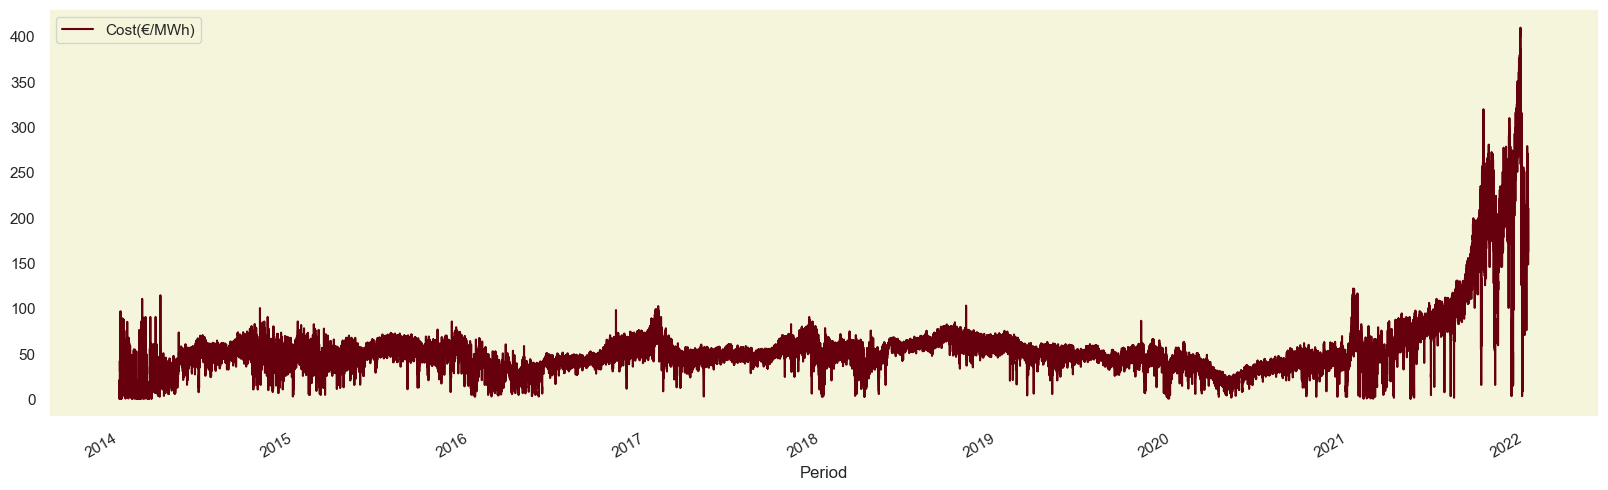

In [13]:
df_Spain.groupby('Period')['Cost(€/MWh)'].agg('sum').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

In [15]:
df_Spain = df_Spain.set_index('Period')
df_Spain.sort_index(inplace=True)
df_Spain.head()

,Cost(€/MWh)
Period,
2014-01-01 00:00:00,20.0200
2014-01-01 01:00:00,10.3400
2014-01-01 02:00:00,5.3500
2014-01-01 03:00:00,5.0000
2014-01-01 04:00:00,0.5000


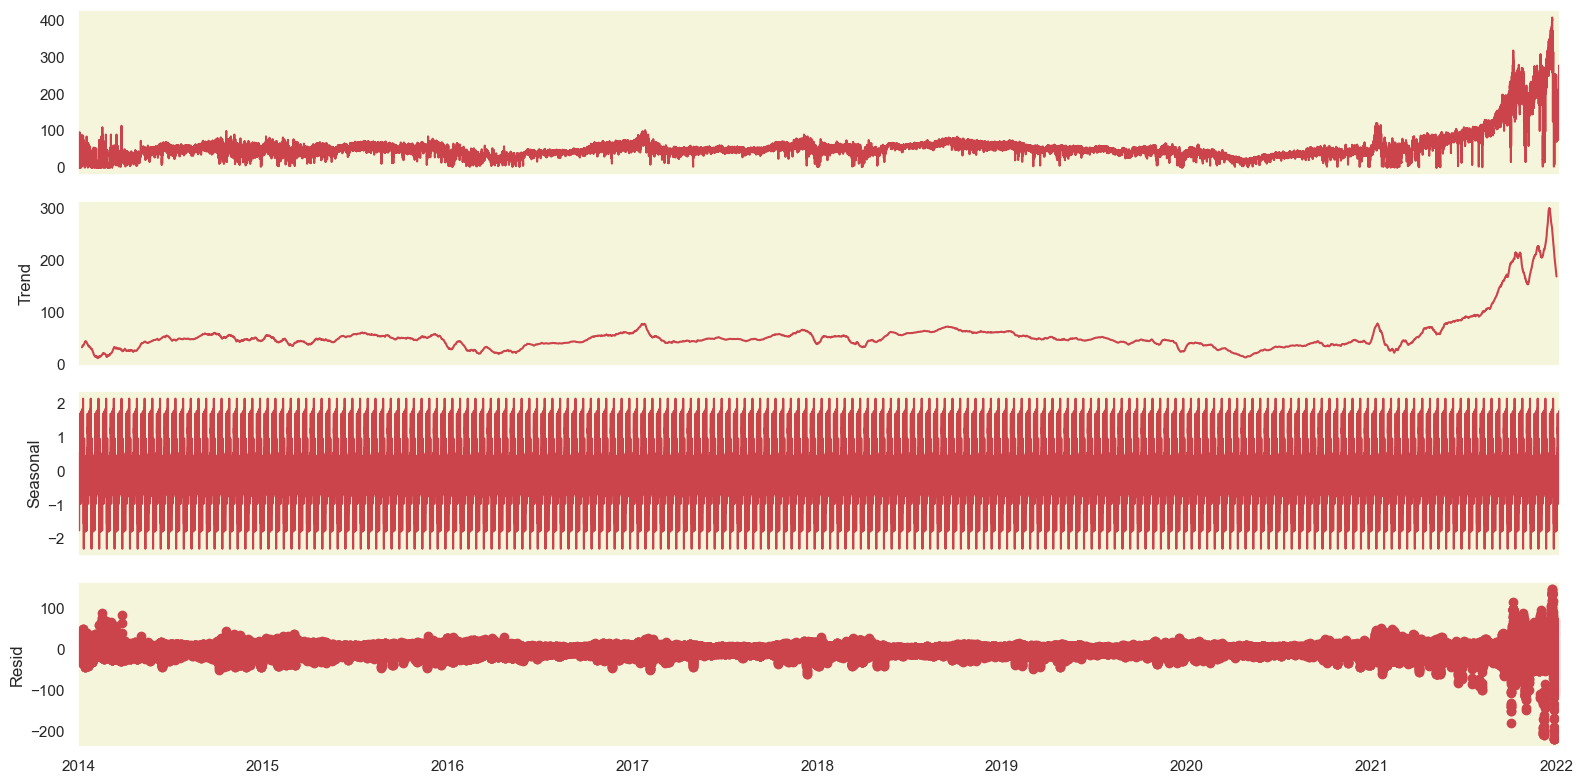

In [17]:
# Set color style
plt.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#cc444b', '#e89005'])
plt.rcParams["figure.figsize"] = (16, 8)

from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df_Spain, period=365).plot()
plt.show();

In [19]:
df_Spain1 = df_Spain.reset_index('Period')

# Create new columns for year, quarter, month, and day
df_Spain1['year'] = df_Spain1['Period'].apply(lambda x: x.year)
df_Spain1['quarter'] = df_Spain1['Period'].apply(lambda x: x.quarter)
df_Spain1['month'] = df_Spain1['Period'].apply(lambda x: x.month)
df_Spain1['day'] = df_Spain1['Period'].apply(lambda x: x.day)
df_Spain1["Day"] = df_Spain1["Period"].dt.dayofweek
df_Spain1["Hour"] = df_Spain1["Period"].dt.hour
df_Spain1['MonthName'] = df_Spain1['Period'].apply(lambda x : x.month_name())
df_Spain1['weekday'] = df_Spain1['Period'].apply(lambda x: x.weekday() < 5).astype(int)

df_Spain1.sort_values('Period', inplace=True, ascending=True)
df_Spain1.head()

,Period,Cost(€/MWh),year,quarter,month,day,Day,Hour,MonthName,weekday
0,2014-01-01 00:00:00,20.0200,2014,1,1,1,2,0,January,1
1,2014-01-01 01:00:00,10.3400,2014,1,1,1,2,1,January,1
2,2014-01-01 02:00:00,5.3500,2014,1,1,1,2,2,January,1
3,2014-01-01 03:00:00,5.0000,2014,1,1,1,2,3,January,1
4,2014-01-01 04:00:00,0.5000,2014,1,1,1,2,4,January,1


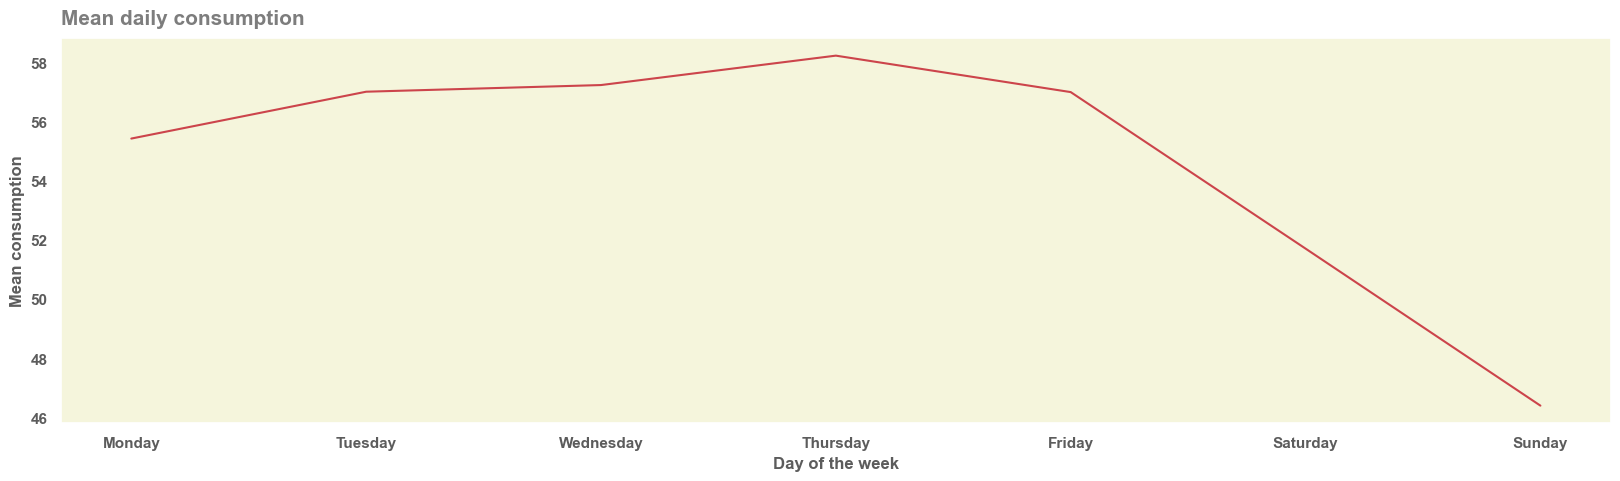

In [21]:
df2 = df_Spain1.set_index('Period')

mean_per_day = df2.groupby("Day")["Cost(€/MWh)"].agg(["mean"])

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(mean_per_day.index,mean_per_day["mean"])

plt.xticks(mean_per_day.index, ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"], alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")
plt.xlabel("Day of the week",alpha=0.75, weight="bold")
plt.ylabel("Mean consumption",alpha=0.75, weight="bold")
plt.title("Mean daily consumption", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10);
del mean_per_day

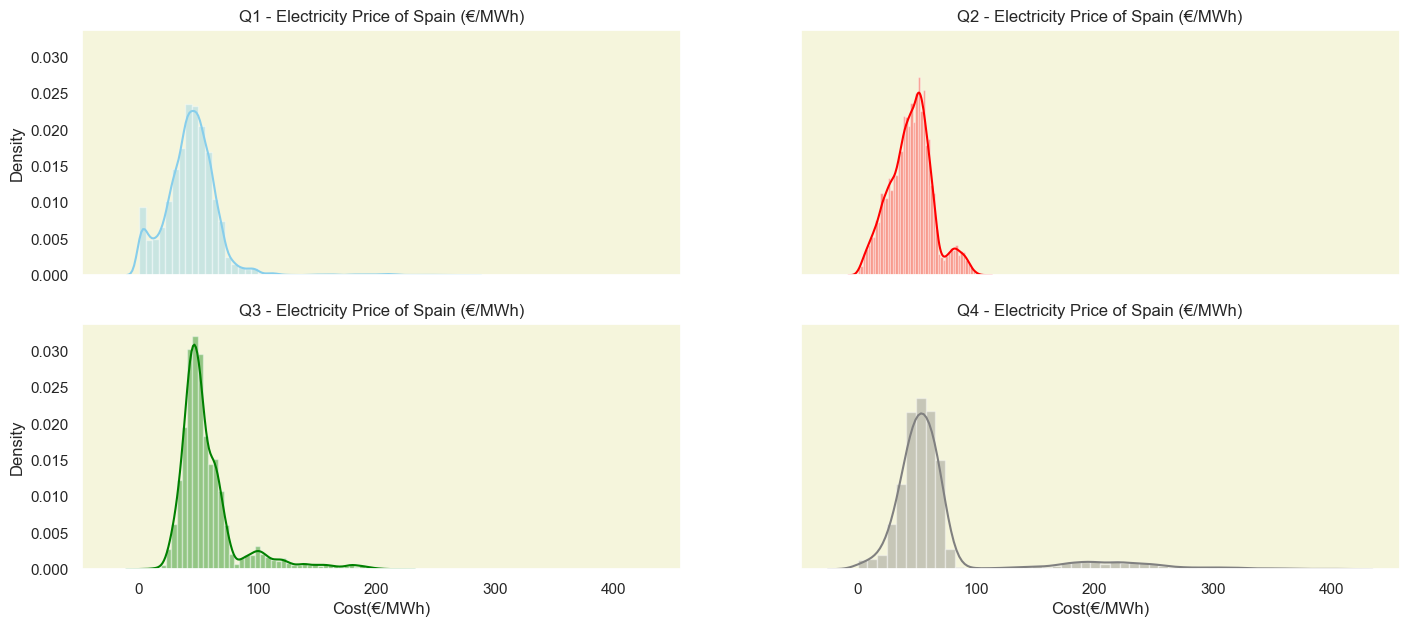

In [23]:
#Data prep
Q1 = df2[df2["quarter"]==1]
Q2 = df2[df2["quarter"]==2]
Q3 = df2[df2["quarter"]==3]
Q4 = df2[df2["quarter"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.distplot(Q1["Cost(€/MWh)"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Electricity Price of Spain (€/MWh)")
sns.distplot(Q2["Cost(€/MWh)"],color="red", ax=axes[0,1]).set_title("Q2 - Electricity Price of Spain (€/MWh)")
sns.distplot(Q3["Cost(€/MWh)"],color="green", ax=axes[1,0]).set_title("Q3 - Electricity Price of Spain (€/MWh)")
sns.distplot(Q4["Cost(€/MWh)"],color="gray", ax=axes[1,1]).set_title("Q4 - Electricity Price of Spain (€/MWh)")

del Q1, Q2, Q3, Q4

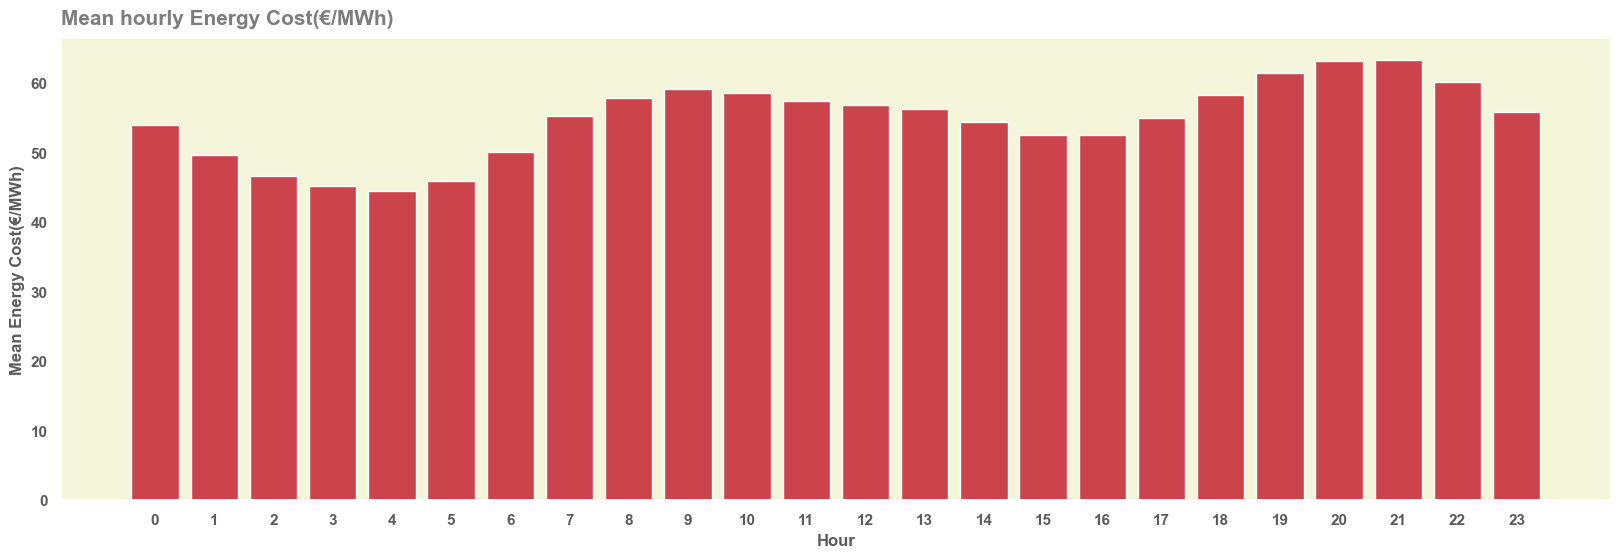

In [25]:
mean_per_hour = df2.groupby("Hour")["Cost(€/MWh)"].agg(["mean"])

fig, ax = plt.subplots(figsize=(20,6))

plt.bar(mean_per_hour.index, mean_per_hour["mean"])

plt.xticks(range(24),alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")
plt.xlabel("Hour",alpha=0.75, weight="bold")
plt.ylabel("Mean Energy Cost(€/MWh)",alpha=0.75, weight="bold")
plt.title("Mean hourly Energy Cost(€/MWh)", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

del mean_per_hour

In [27]:
df2 = df2.drop('MonthName',axis=1)
df2.head()

,Cost(€/MWh),year,quarter,month,day,Day,Hour,weekday
Period,,,,,,,,
2014-01-01 00:00:00,20.0200,2014,1,1,1,2,0,1
2014-01-01 01:00:00,10.3400,2014,1,1,1,2,1,1
2014-01-01 02:00:00,5.3500,2014,1,1,1,2,2,1
2014-01-01 03:00:00,5.0000,2014,1,1,1,2,3,1
2014-01-01 04:00:00,0.5000,2014,1,1,1,2,4,1


In [29]:
print('Number of rows and columns:', df_Spain1.shape)
print('Minimum date_time:', df_Spain1.Period.min())
print('Maximum date_time:', df_Spain1.Period.max())

df_Spain1.head(5)

Number of rows and columns: (70296, 10)
Minimum date_time: 2014-01-01 00:00:00
Maximum date_time: 2022-01-08 23:00:00


,Period,Cost(€/MWh),year,quarter,month,day,Day,Hour,MonthName,weekday
0,2014-01-01 00:00:00,20.0200,2014,1,1,1,2,0,January,1
1,2014-01-01 01:00:00,10.3400,2014,1,1,1,2,1,January,1
2,2014-01-01 02:00:00,5.3500,2014,1,1,1,2,2,January,1
3,2014-01-01 03:00:00,5.0000,2014,1,1,1,2,3,January,1
4,2014-01-01 04:00:00,0.5000,2014,1,1,1,2,4,January,1


In [31]:
# Test for Normality of the Global Active Power Data

# Import the required libraries
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(df_Spain['Cost(€/MWh)'])

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=54725.058, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 18.563754859879868
Skewness of normal distribution: 3.678748967369027


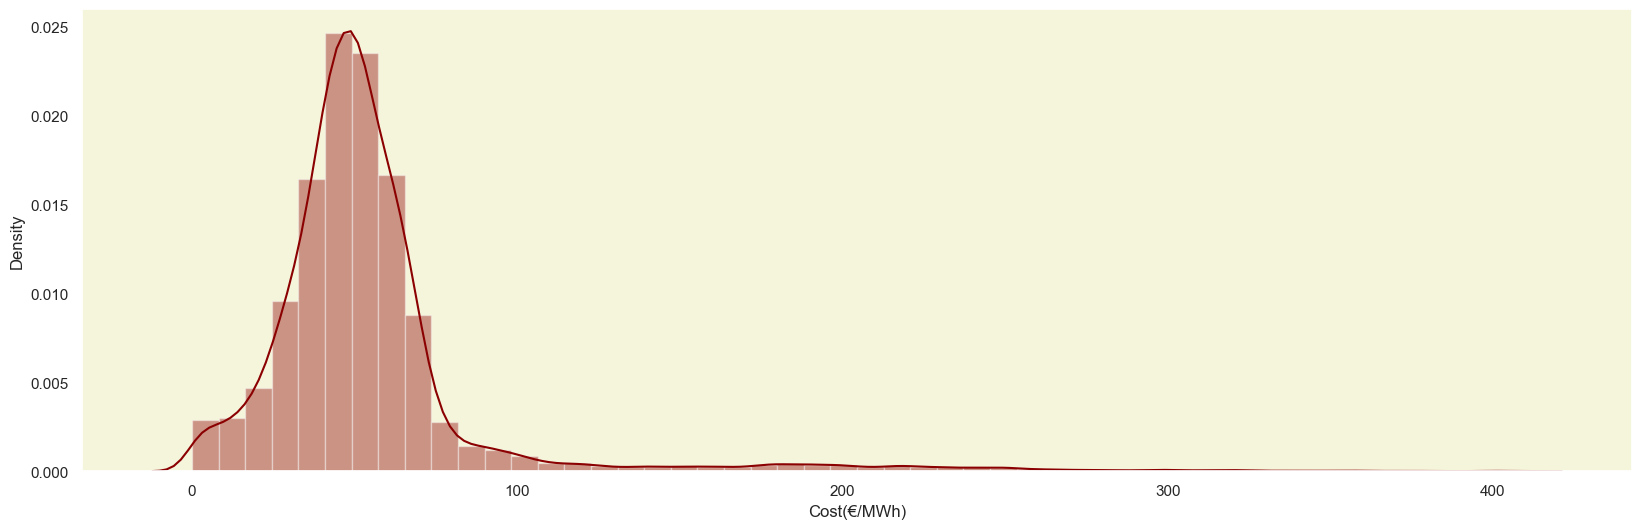

In [33]:
plt.figure(figsize=(20,6))
sns.distplot(df_Spain1['Cost(€/MWh)'],color='darkred')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_Spain1['Cost(€/MWh)'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df_Spain1['Cost(€/MWh)'])))

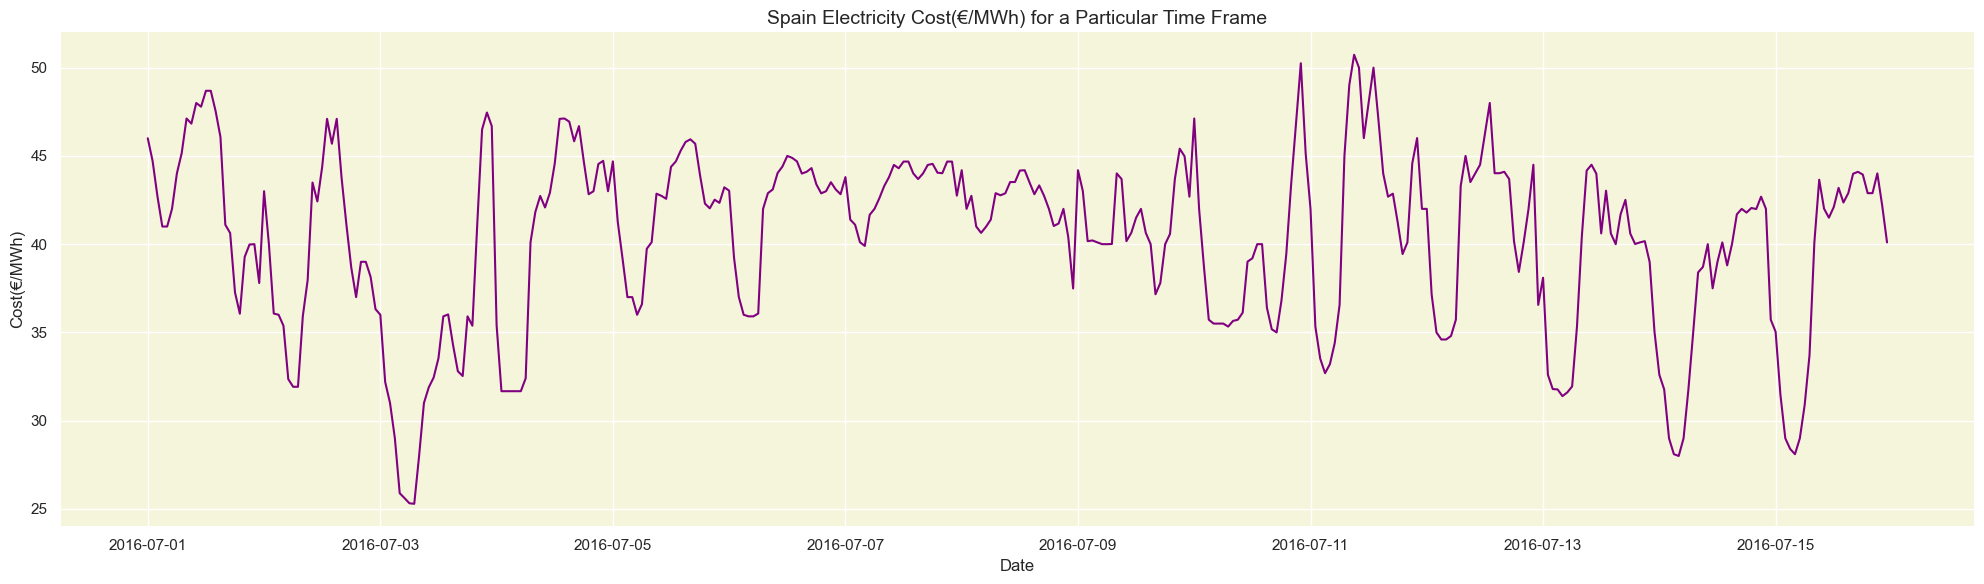

In [35]:
data1 = df_Spain1[(df_Spain1['Period'] >= '2016-07-01') & (df_Spain1['Period'] < '2016-7-16')]

plt.figure(figsize=(20,6))
plt.plot(data1['Period'], data1['Cost(€/MWh)'], color='purple')
plt.ylabel('Cost(€/MWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Spain Electricity Cost(€/MWh) for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

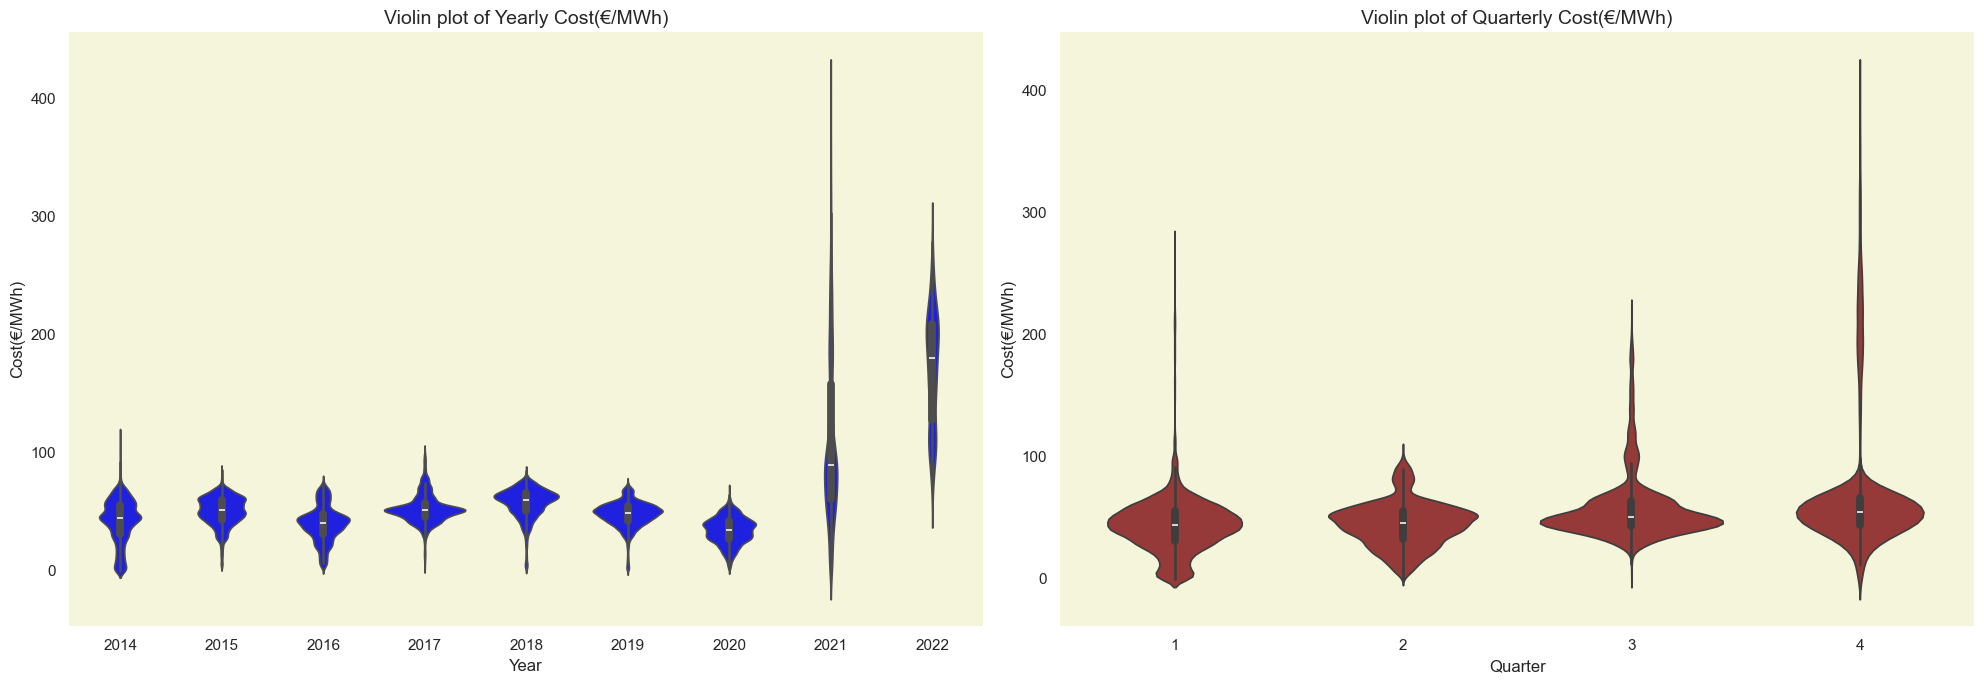

In [37]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.violinplot(x="year", y="Cost(€/MWh)", data=df_Spain1, color='Blue')
plt.xlabel('Year', fontsize=12)
plt.title('Violin plot of Yearly Cost(€/MWh)', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout() 


plt.subplot(1,2,2)
sns.violinplot(x="quarter", y="Cost(€/MWh)", data=df_Spain1, color='Brown')
plt.xlabel('Quarter', fontsize=12)
plt.title('Violin plot of Quarterly Cost(€/MWh)', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()

Text(0.5, 1.0, 'Normal Probability Plot of Cost(€/MWh)')

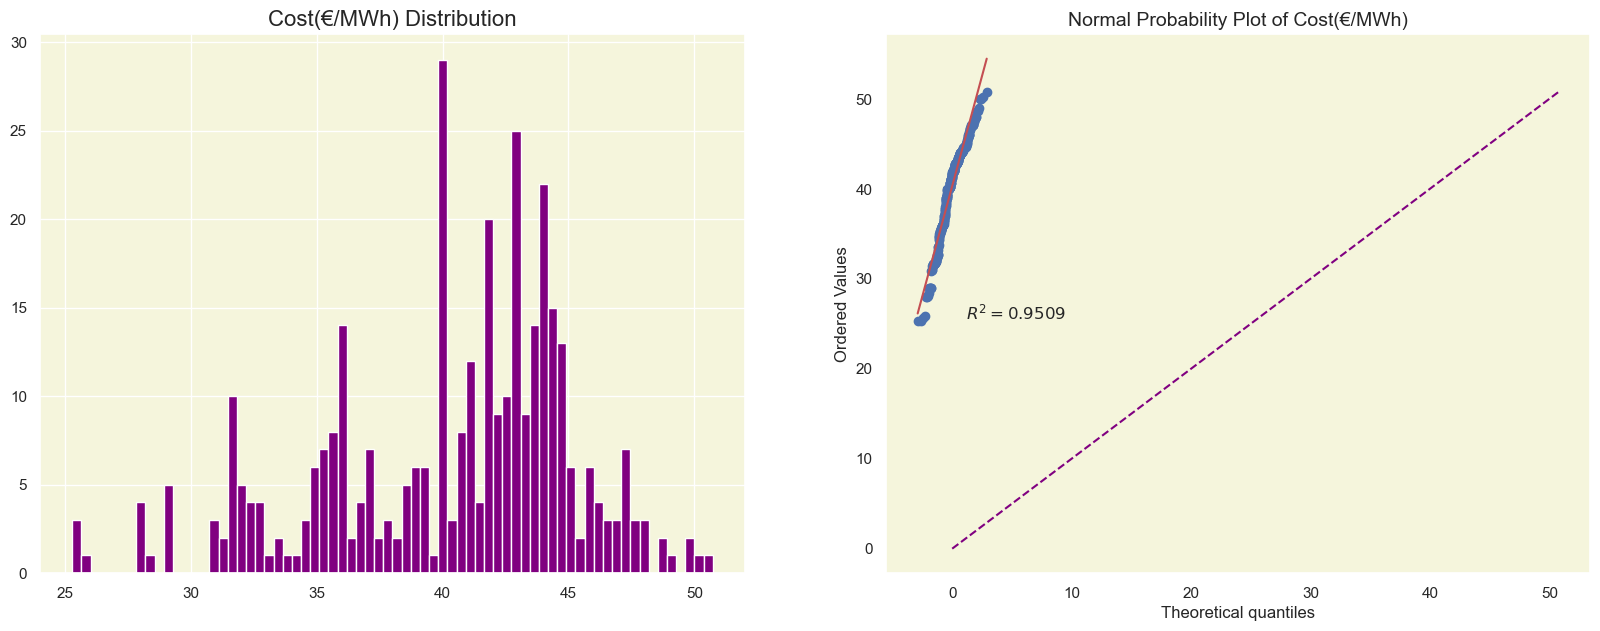

In [39]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(20,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Cost(€/MWh)'].hist(bins=70, color='purple')
plt.title('Cost(€/MWh) Distribution', fontsize=16)

# Normal Probability Plot of 'Cost(€/MWh)' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Cost(€/MWh)'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Cost(€/MWh)'])], [0, max(data1['Cost(€/MWh)'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Cost(€/MWh)', fontsize=14)

In [41]:
data1=df_Spain1.loc[:,['Period','Cost(€/MWh)']]
data1.set_index('Period',inplace=True)
data1.head()

,Cost(€/MWh)
Period,
2014-01-01 00:00:00,20.0200
2014-01-01 01:00:00,10.3400
2014-01-01 02:00:00,5.3500
2014-01-01 03:00:00,5.0000
2014-01-01 04:00:00,0.5000


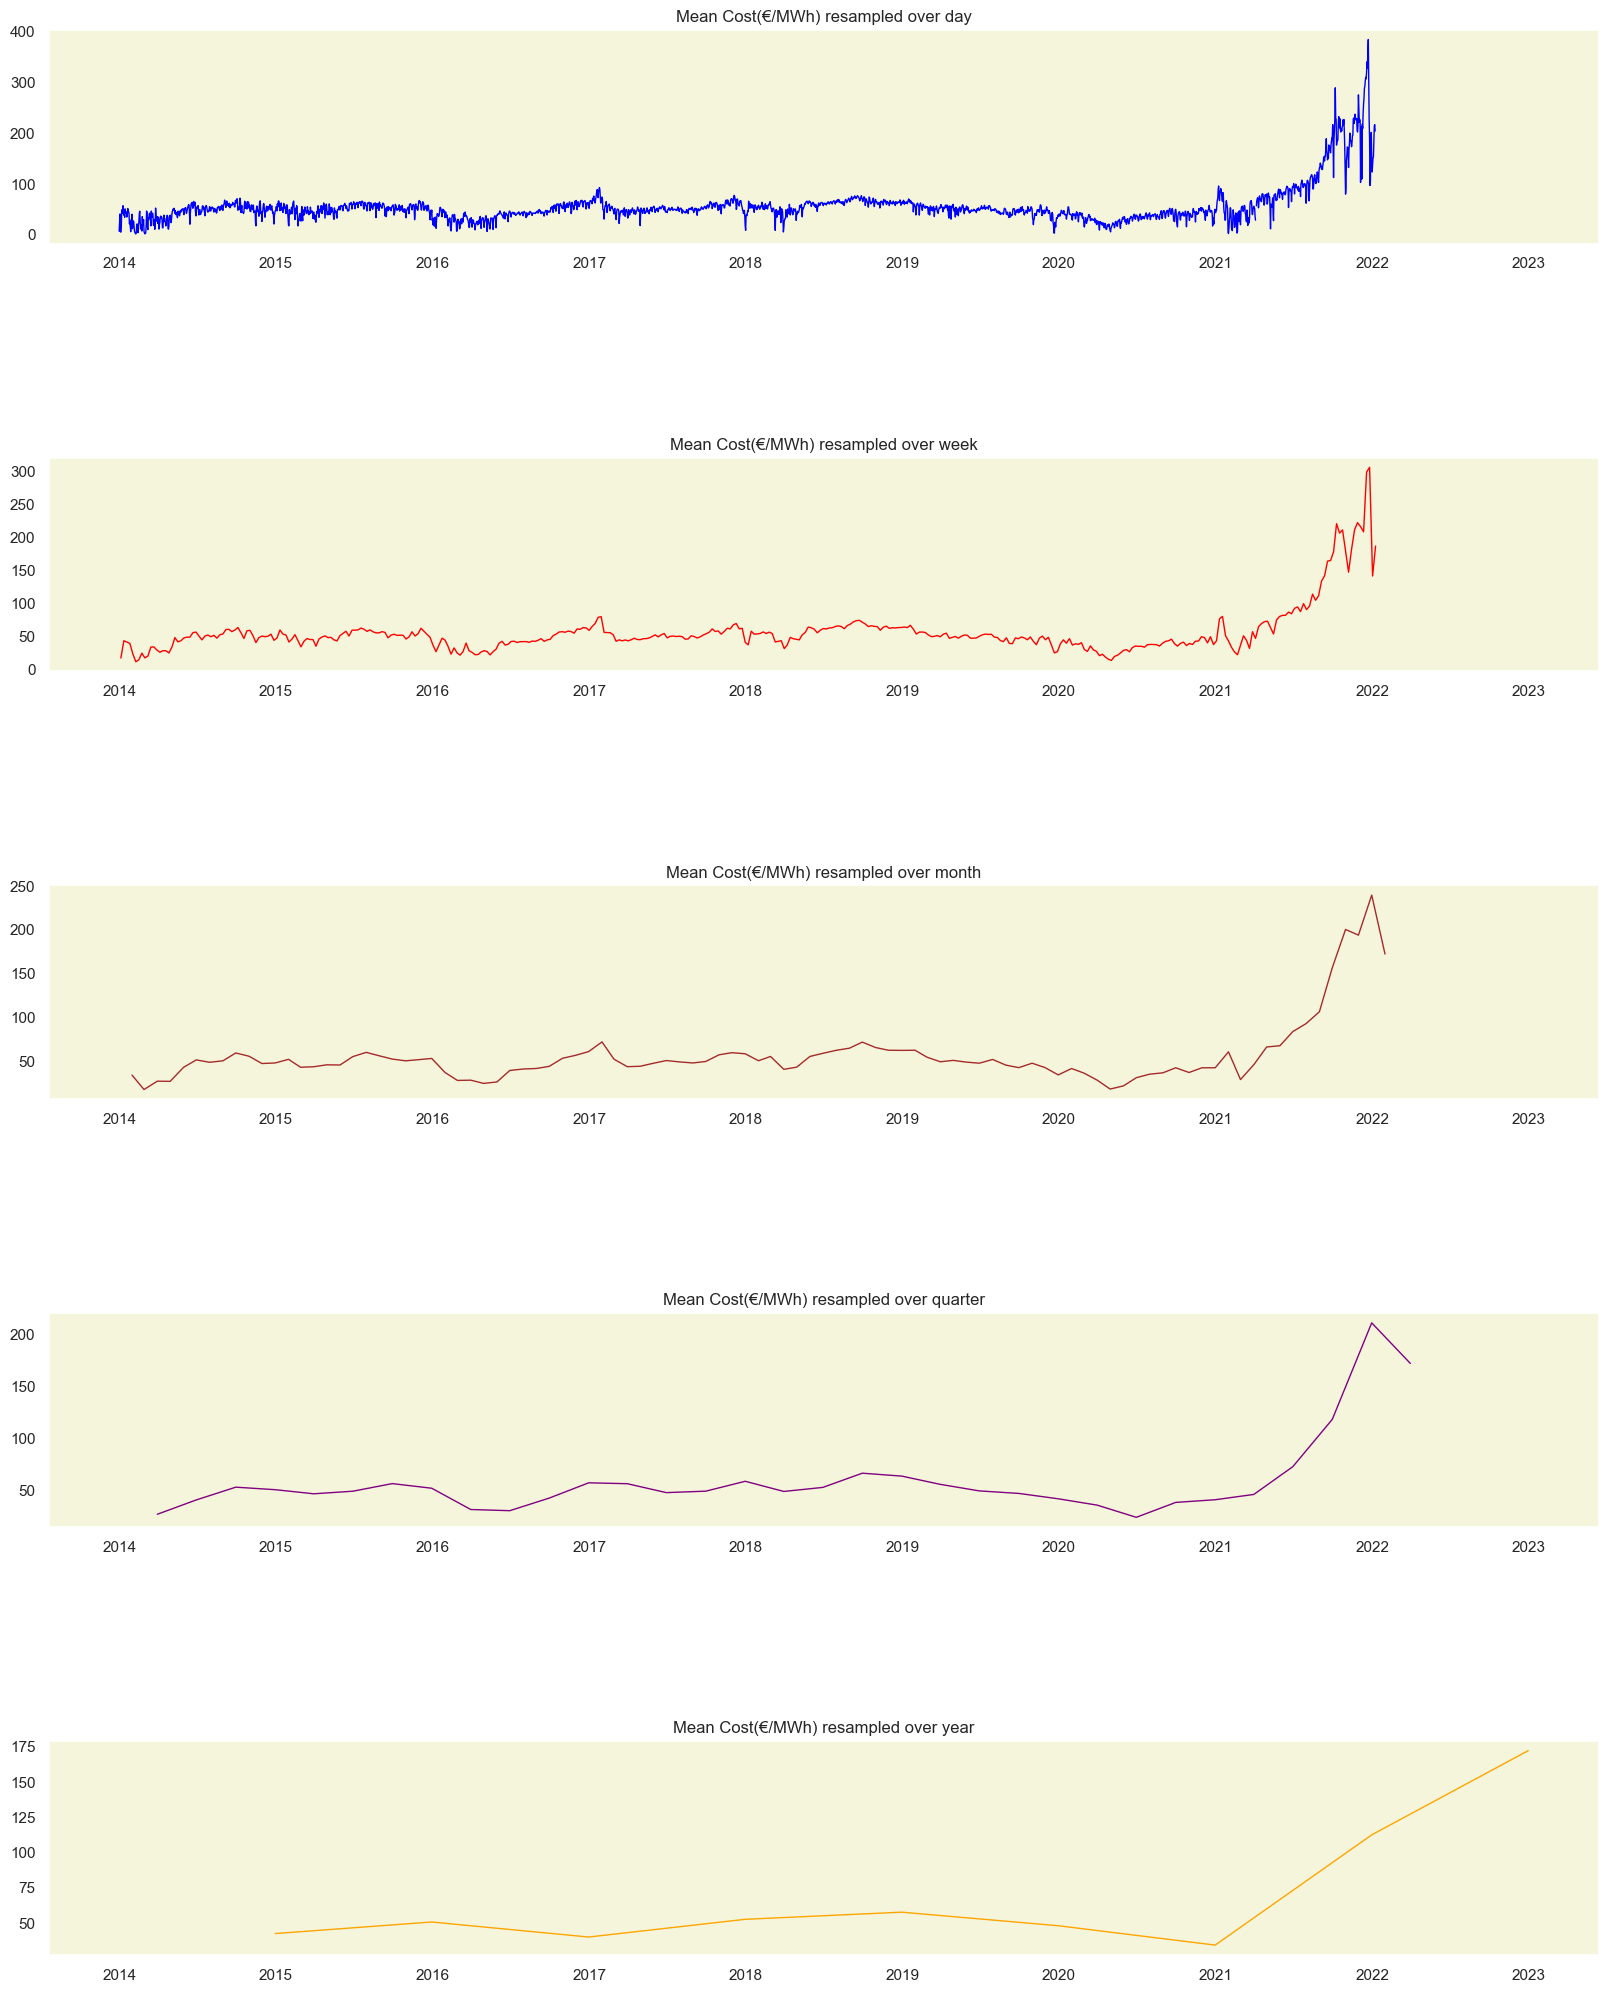

In [43]:
# Create a figure with specified size
fig = plt.figure(figsize=(20,25))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
ax1.plot(data1['Cost(€/MWh)'].resample('D').mean(), linewidth=1, color='Blue')
ax1.set_title('Mean Cost(€/MWh) resampled over day')
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(data1['Cost(€/MWh)'].resample('W').mean(), linewidth=1, color='Red')
ax2.set_title('Mean Cost(€/MWh) resampled over week')
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(data1['Cost(€/MWh)'].resample('M').mean(), linewidth=1, color='Brown')
ax3.set_title('Mean Cost(€/MWh) resampled over month')
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(data1['Cost(€/MWh)'].resample('Q').mean(),linewidth=1, color='purple')
ax4.set_title('Mean Cost(€/MWh) resampled over quarter')
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(data1['Cost(€/MWh)'].resample('A').mean(),linewidth=1, color='Orange')
ax5.set_title('Mean Cost(€/MWh) resampled over year')
ax5.tick_params(axis='both', which='major')

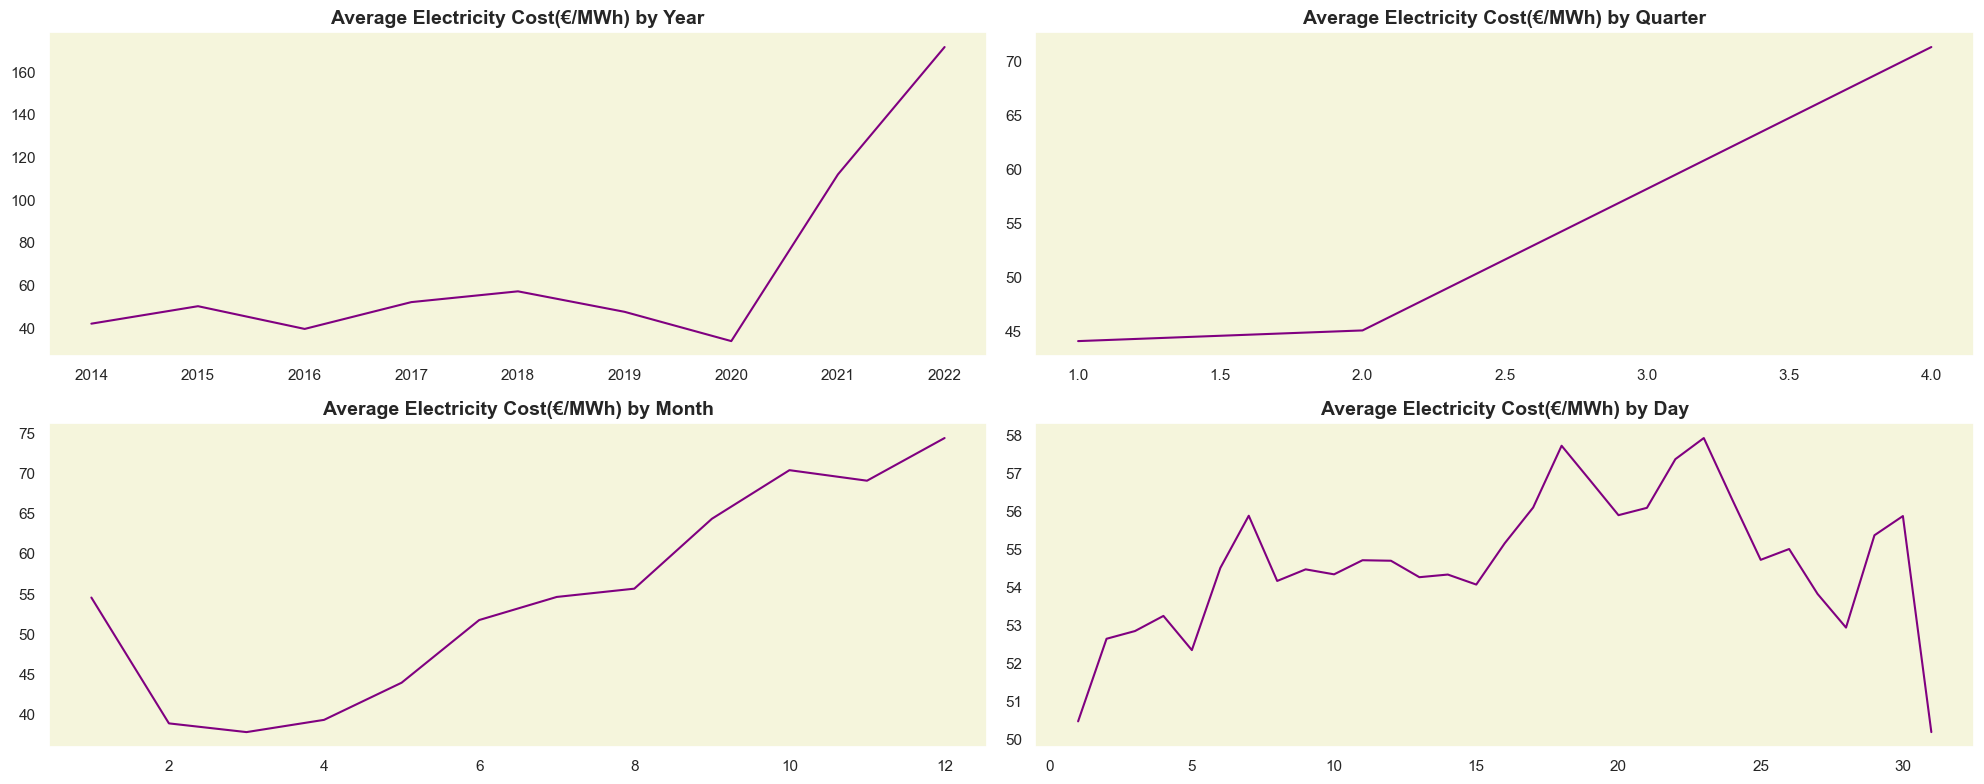

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
grouped_by_year = df_Spain1.groupby('year')['Cost(€/MWh)'].agg('mean')
grouped_by_year.plot(color='purple')
plt.xlabel('')

plt.title('Average Electricity Cost(€/MWh) by Year', fontsize=14, fontweight='bold')
plt.subplot(2,2,2)

grouped_by_quarter = df_Spain1.groupby('quarter')['Cost(€/MWh)'].agg('mean')

grouped_by_quarter.plot(color='purple')
plt.xlabel('')

plt.title('Average Electricity Cost(€/MWh) by Quarter', fontsize=14, fontweight='bold')
plt.subplot(2,2,3)

grouped_by_month = df_Spain1.groupby('month')['Cost(€/MWh)'].agg('mean')

grouped_by_month.plot(color='purple')
plt.xlabel('')

plt.title('Average Electricity Cost(€/MWh) by Month', fontsize=14, fontweight='bold')
plt.subplot(2,2,4)

grouped_by_day = df_Spain1.groupby('day')['Cost(€/MWh)'].agg('mean')

grouped_by_day.plot(color='purple')
plt.xlabel('')

plt.title('Average Electricity Cost(€/MWh) by Day', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

In [47]:
#Dickey-Fuller test statistical test to determine the stationarity of a time series¶ The Dickey-Fuller test is used to test the null hypothesis that
#a unit root is present in a time series, which means it is non-stationary and has some time-dependent structure. On the other hand, the alternative
#hypothesis is that the time series does not have a unit root, meaning it is stationary and does not have time-dependent structure.
#In the Dickey-Fuller test, if the p-value is greater than 0.05, it means we accept the null hypothesis and the data is considered to be non-stationary.
#However, if the p-value is less than or equal to 0.05, we reject the null hypothesis and the data is considered to be stationary.
#While LSTM models do not require stationarity of the data, a stationary series with constant mean and variance over time can result in better 
#performance and make it easier for the neural network to learn.

In [49]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Cost(€/MWh)')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

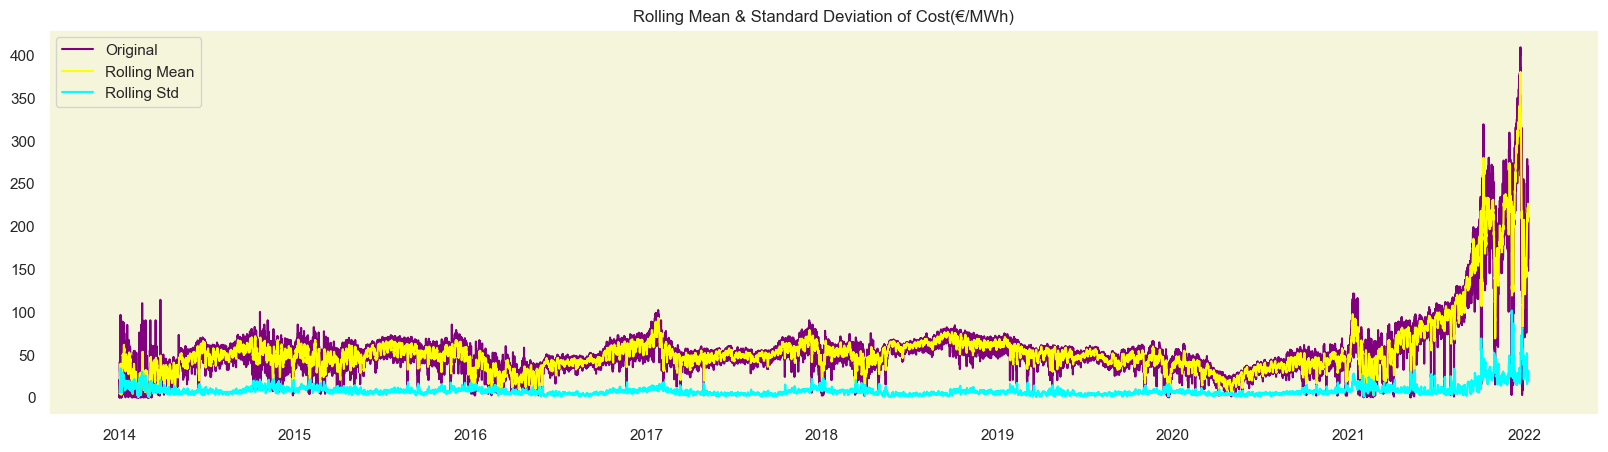

<Results of Dickey-Fuller Test>
Test Statistic                   -5.7593
p-value                           0.0000
#Lags Used                       59.0000
Number of Observations Used   70236.0000
Critical Value (1%)              -3.4304
Critical Value (5%)              -2.8616
Critical Value (10%)             -2.5668
dtype: float64


In [51]:
test_stationarity(data1['Cost(€/MWh)'].dropna())

In [53]:
#The null hypothesis, which suggests the presence of a unit root and therefore non-stationarity in the time series, can be rejected based on the 
#results of the Dickey-Fuller test.
#This implies that the data does not have a time-dependent structure and is stationary.
#In this task, the goal is to predict the power consumption of a household for a time series, based on the history of 2 million minutes of consumption
#data.
#To accomplish this, we will use a multi-layer LSTM recurrent neural network. To ensure that the model provides an accurate prediction, the data
#will be kept at its original minute-level resolution, instead of being resampled to a lower frequency such as hours.

In [55]:
#Modelling and Evaluation

In [57]:
dataset = df_Spain['Cost(€/MWh)'].values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [59]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [61]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [63]:
print(X_train.shape)
print(Y_train.shape)

(56205, 30)
(56205,)


In [65]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(56205, 1, 30)

In [69]:
#LSTM Model :1

In [71]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=20, batch_size=1240, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2741e-04 - val_loss: 0.0027
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1273e-04 - val_loss: 0.0021
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2805e-04 - val_loss: 0.0015
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5003e-04 - val_loss: 0.0012
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7701e-04 - val_loss: 9.8738e-04
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2749e-04 - val_loss: 9.0402e-04
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9446e-04 - val_loss: 9.3589e-04
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7719e-04 - val_loss: 0.0010
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6163e-04 - val_loss: 0.0011
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4909e-04 - val_loss: 0.0011


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          52,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,505 (615.26 KB)

 Trainable params: 52,501 (205.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,004 (410.18 KB)

In [73]:
#Evaluation

In [75]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

1757/1757 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Train Mean Absolute Error: 5.327430865418316
Train Root Mean Squared Error: 6.421475072032612
Test Mean Absolute Error: 9.501925597016536
Test Root Mean Squared Error: 13.768221109468076


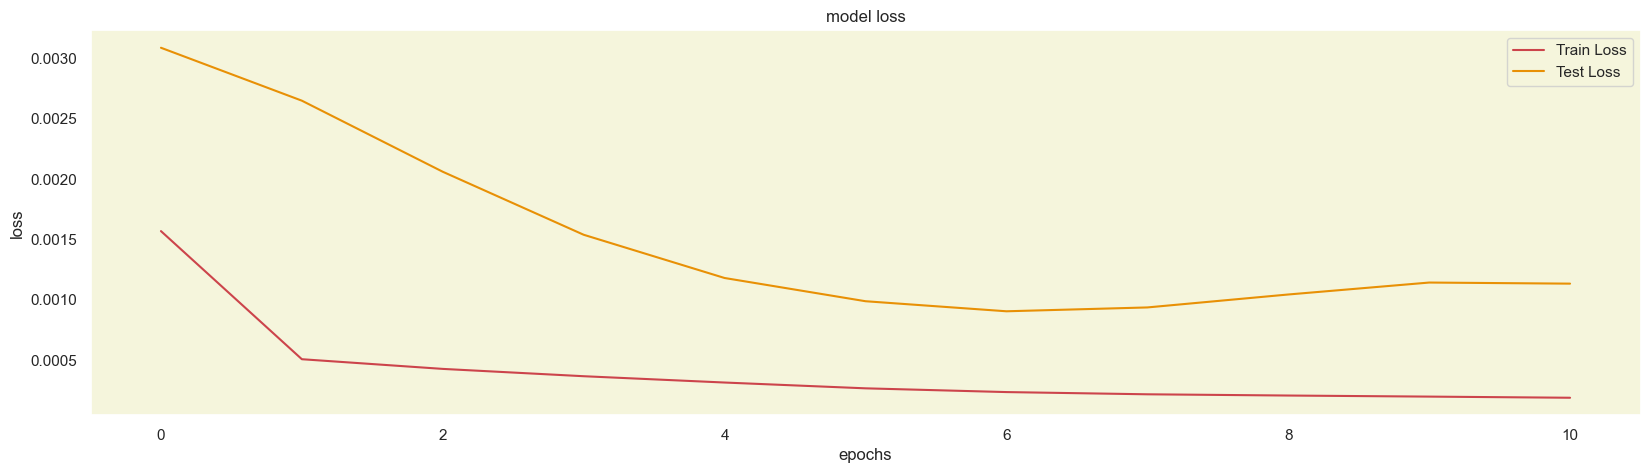

In [77]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

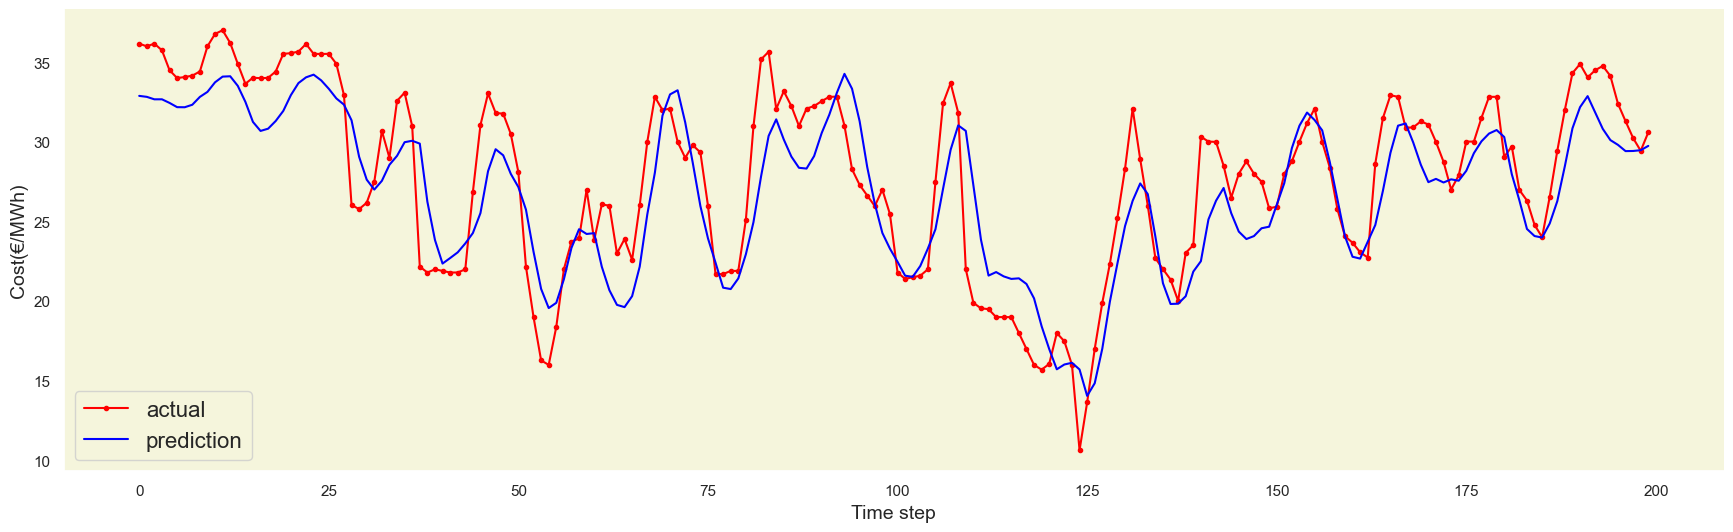

In [79]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='Red')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='Blue')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Cost(€/MWh)', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [151]:
#pandas Data Filtering Challenges